# 2020 NBA Draft Sınıfının İlk Yıllarındaki Üçlük Performansı Tahmini

Hazırlayan: Alp Yıldırım

# Giriş

NBA(National Basketball Association), ABD ve dünyanın en yüksek bütçeli basketbol ligidir. NBA'de oyuncu sirkülayonunun devamını sağlayan, lige her sene yeni basketbolcuların girmesine olanak tanıyan yegane yol her sene yapılan NBA Draft'ıdır. Bu draft'larda ligde bulunan 30 takım bir adet ilk tur, bir adet de ikinci tur seçimine sahip olur ve her sene toplam iki oyuncu draft eder. Draft'ta seçilen oyuncuların büyük kısmı NCAA adı verilen Amerikan Kolej Basketbol Ligi'nde oynadıktan sonra lige girmekle beraber son dönemde Avrupa'dan NBA'e giden oyuncu sayısı da artış göstermiştir. 

NBA'de özellikle 2013 yılından sonra basketbol kademeli olarak değişime uğramıştır. Basketbol analitiği kavramı ile tanışılması ve performanslara dair gelişmiş istatistiksel metriklerin artması ile beraber dünyadaki birçok sektörde olduğu gibi basketbolda da verilerden anlam çıkarmak çok değerli bir hale gelmiş, hatta bu kapsamda ligdeki takımlar analitik departmanlarında veri bilimcilerle çalışmaya başlamışlardır. NBA'deki analitik departmanlarının analizleri bize basketbolda kullanılabilecek en efektif şutların pota dibinden atılan şutlar ve üç sayılık şutlar olduğunu, en efektif olmayan şutların ise orta mesafeden kullanılan şutlar olduğunu göstermiştir.

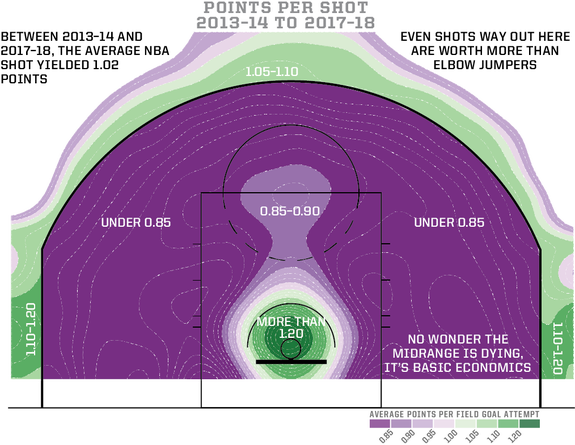

Bu görselde de görülebileceği gibi hücum başına en çok sayı getiren hücumlar 1.2 civarında bir ortalama ile pota dibinden kullanılan şutlar ve köşe üçlükleridir. Bu şutu 1.1 civarında bir getiri ile köşe üçlükleri harici üçlükler takip etmektedir. En verimsiz şut ise 0.85 gibi bir getirisi olan orta mesafe şutlarıdır.

Bu verilerden çıkan sonuçlar sayesinde 2013 öncesinde pota dibi ve orta mesafe şut odaklı oynanan, üçlüğe o kadar da önem verilmeyen basketbolun tarzı kademeli olarak değişmiştir. Takımlar eskiye kıyasla çok daha az orta mesafe şut kullanmaya ve kullandıkları üçlük sayısını kademeli olarak arttırmaya başlamıştır. Bu bağlamda şutör adı verilen üçlük yüzdesi iyi oyuncular eskiye kıyasla çok daha değerli bir hale gelmiştir. 

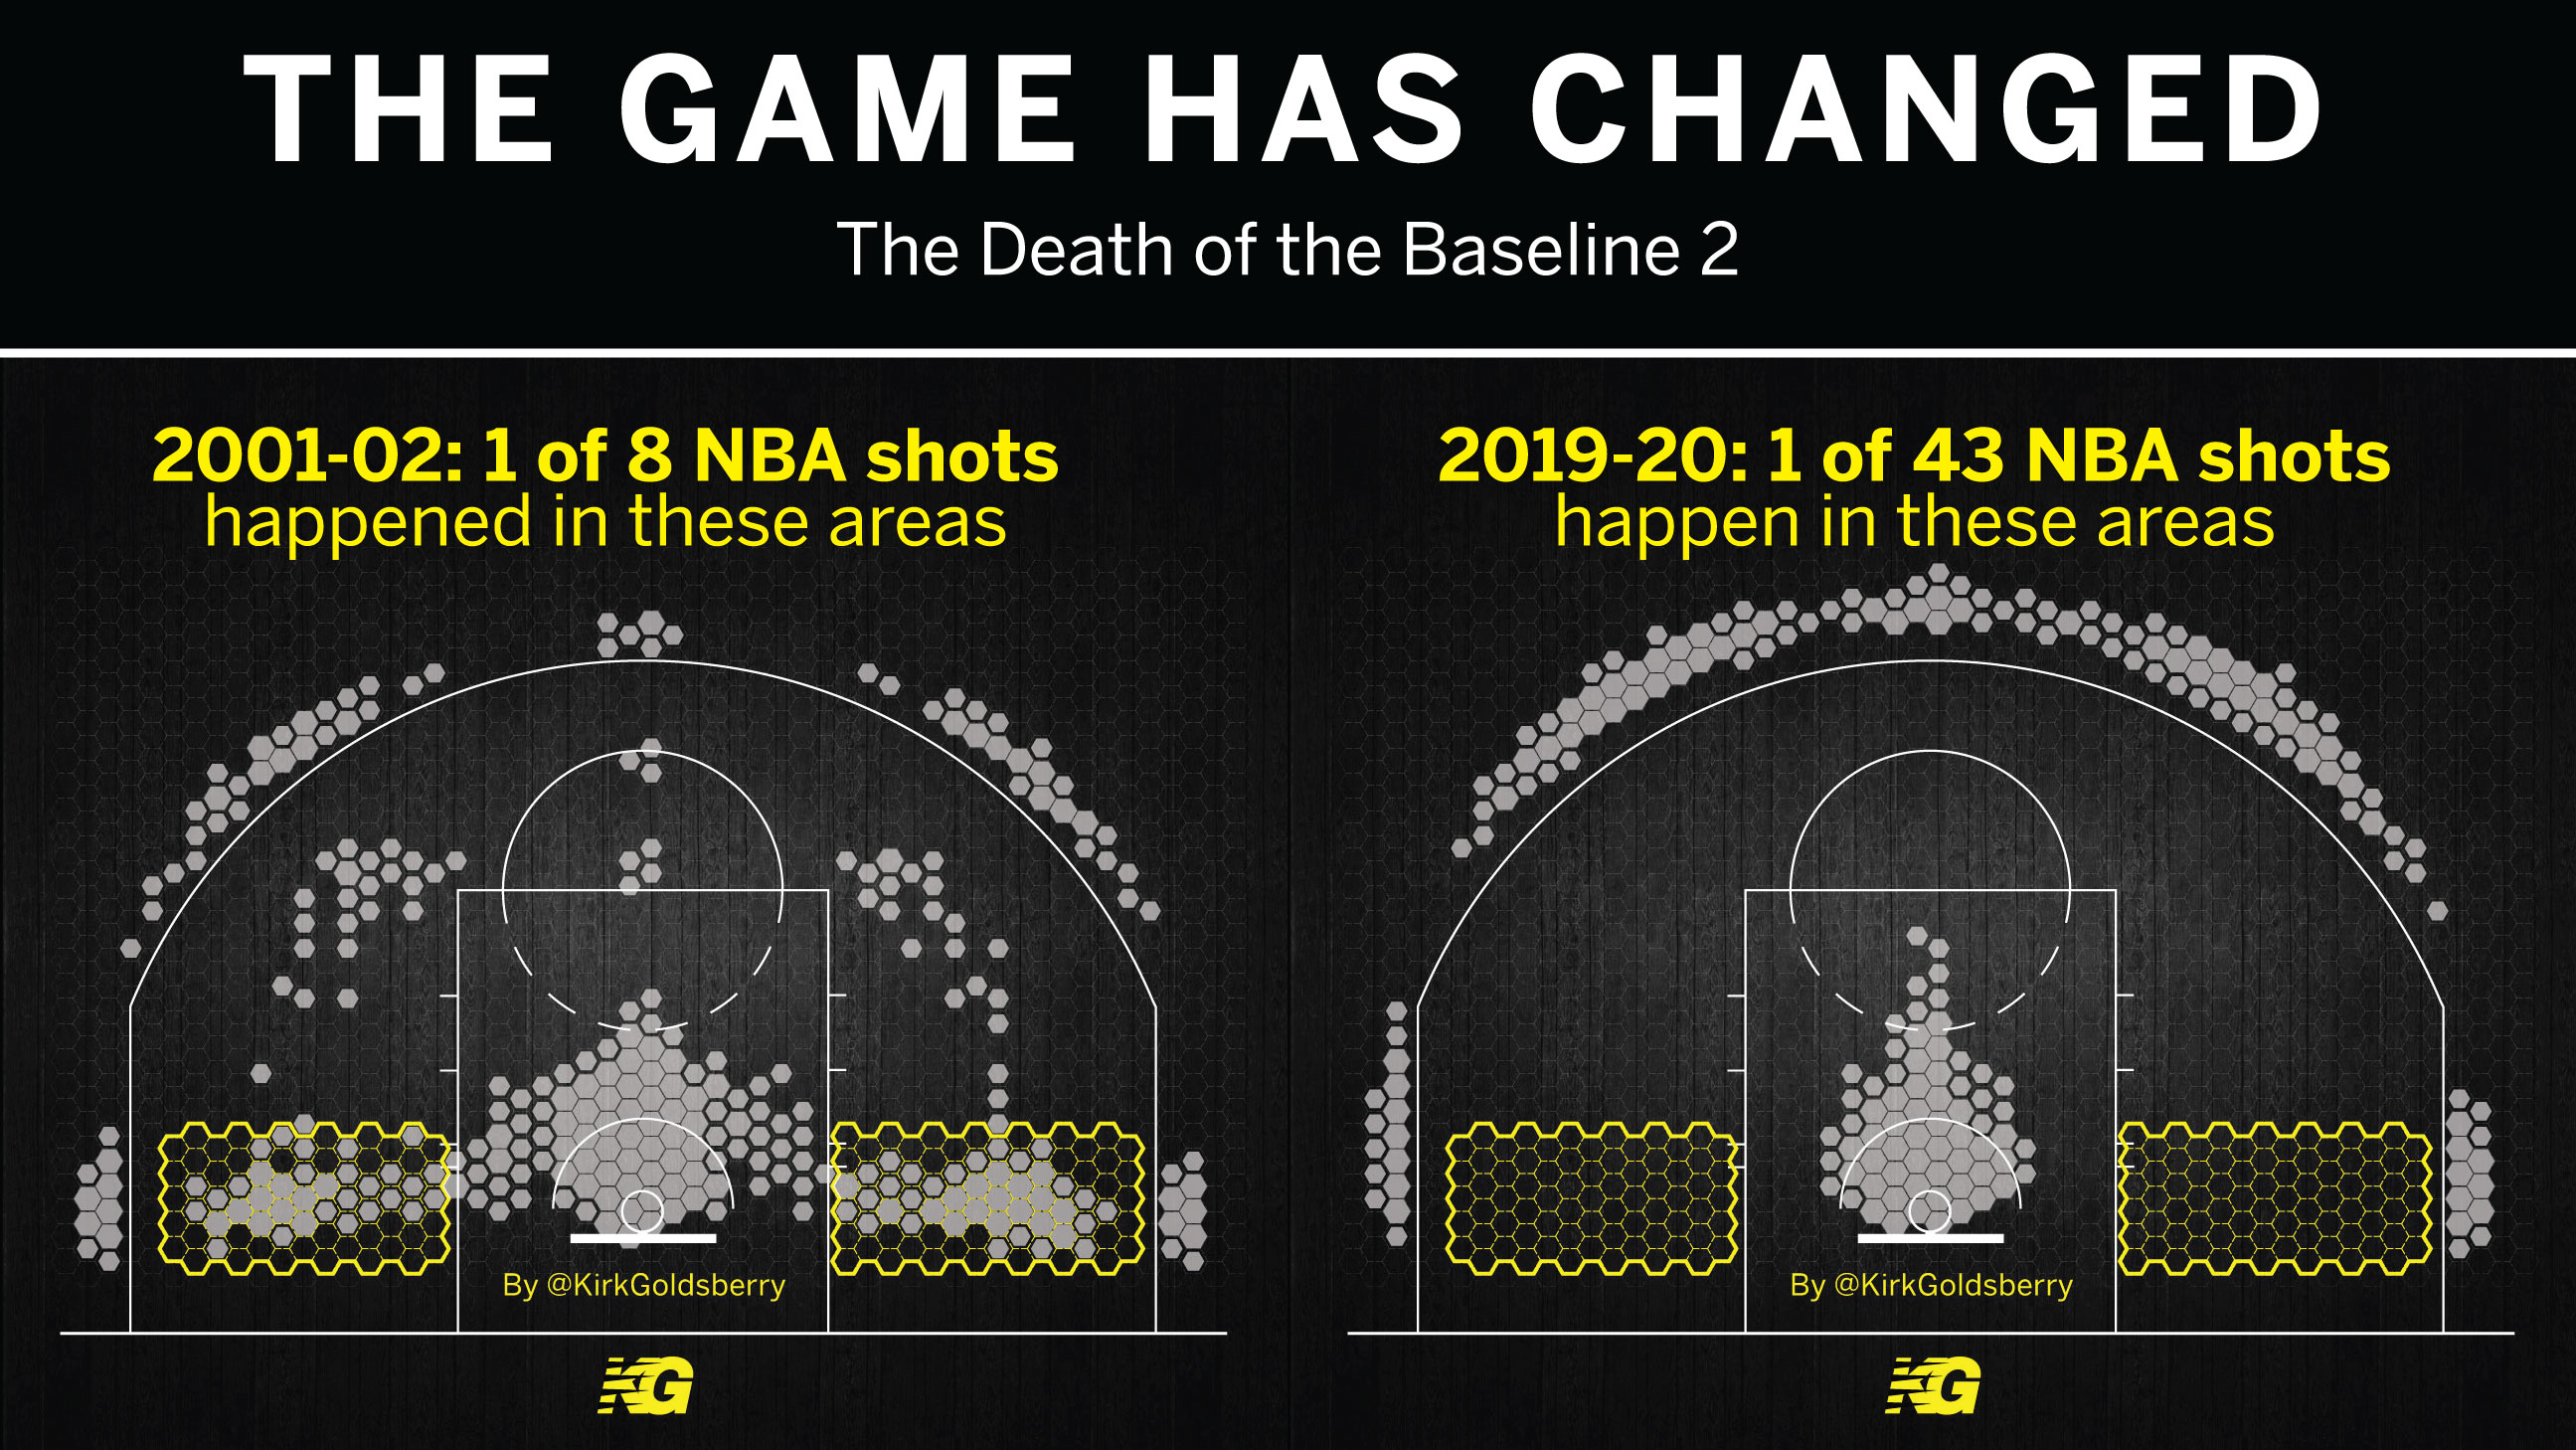

Bütün bu bilgiler ışığında konuşacak olursak, NBA takımları için draft'larda takımlarına NBA'de iyi şut atabilecek oyuncuları katmak elzem bir hal almıştır. Kolej ve Avrupa basketbolundaki üçlük çizgisi NBA'e kıyasla potaya daha yakın olduğu için bu liglerde başarılı üçlük atmak NBA'de başarılı bir şutör olmak için yeterli bir indikatör değildir, zira bu liglerde üçlük çizgisinin hemen gerisinden atılan bir üçlük potaya uzaklık olarak NBA'de orta mesafe şutuna denk gelmektedir. 

Bu projede de bu problemden yola çıkılmış, kolejde basketbol oynadıktan sonra NBA'e girmiş oyuncuların kolej verileri kullanılarak NBA'deki ilk yıllarında atacakları maç başı üçlük sayısı ve üçlük yüzdeleri dört farklı tahminleme modeli kullanarak tahmin edilmiştir. 

# Gerekli Kütüphanelerin İndirilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import LinearSVR
import xgboost
import shap
import scipy.stats as stats
from statsmodels.stats import stattools as stools

# Veri Setlerinin Yüklenmesi

In [2]:
historical = pd.read_csv('2000-2019.csv')
current = pd.read_csv('2020 draft class.csv')

In [3]:
historical.head()

Player      School  Year  Pick Pos    G    MP    FG%    2P%  \
0    Kenyon Martin  Cincinnati  2000     1  PF  116  23.7  0.586  0.590   
1   Stromile Swift         LSU  2000     2  PF   50  26.6  0.560  0.585   
2     Marcus Fizer  Iowa State  2000     3  PF   97  32.9  0.511  0.524   
3      Mike Miller     Florida  2000     4  SF   65  26.7  0.483  0.565   
4  DerMarr Johnson  Cincinnati  2000     5  SF   32  27.5  0.478  0.575   

   College 3P%    FT%   PTS   SOS    TS%   eFG%   3PAr    FTr  OWS  3PTM  \
0        0.222  0.581  11.0  6.65  0.592  0.587  0.010  0.494  8.2  0.01   
1        0.242  0.613  13.4  5.84  0.585  0.569  0.073  0.566  4.1  0.00   
2        0.292  0.702  18.9  6.27  0.558  0.519  0.053  0.453  9.2  0.14   
3        0.345  0.718  13.3  7.07  0.586  0.547  0.376  0.473  5.0  1.80   
4        0.371  0.737  12.6  8.50  0.594  0.567  0.478  0.324  2.6  0.53   

     3P%  
0  0.091  
1  0.000  
2  0.256  
3  0.407  
4  0.323

In [4]:
current.head()

Player         School  Year  Pick Pos   G    MP    FG%    2P%  \
0   Anthony Edwards        Georgia  2020     1  SG  32  33.0  0.402  0.504   
1     James Wiseman        Memphis  2020     2   C   3  23.0  0.769  0.800   
2  Patrick Williams  Florida State  2020     3  PF  29  22.5  0.459  0.503   
3       Isaac Okoro         Auburn  2020     4  SG  28  31.5  0.514  0.607   
4    Onyeka Okongwu            USC  2020     5  PF  28  30.6  0.616  0.621   

   College 3P%    FT%   PTS   SOS    TS%   eFG%   3PAr    FTr  OWS  
0        0.294  0.772  19.1  8.06  0.520  0.473  0.485  0.339  2.5  
1        0.000  0.704  19.7  5.07  0.760  0.769  0.038  1.038  0.5  
2        0.320  0.838   9.2  7.64  0.553  0.498  0.242  0.357  1.2  
3        0.286  0.672  12.9  7.39  0.587  0.556  0.288  0.551  2.3  
4        0.250  0.720  16.2  7.22  0.645  0.618  0.014  0.504  3.2

# Veri Setleri

Amerikan Kolej Basketbol Ligi oyuncularının bu proje kapsamında gerekli verilerini toplu halde indirmek için Kaggle gibi sitelerde mevcut bir veri seti bulunmamaktadır, çeşitli basketbol istatistik sitelerinden .csv uzantısıyla indirilebilecek veri setleri de NBA ile sınırlıdır, bu yüzden gerekli veriler https://www.sports-reference.com/cbb/ sitesinden manuel olarak toplanmıştır. "historical" adındaki dosya 2000-2019 arası kolejde oynamış oyuncuların verilerini, "current" dosyası ise 2020 yılında kolejde oynamış oyuncuların verilerini içermektedir.

# Değişkenler

- Player: Oyuncu Adı
- School: Oyuncunun oynamış olduğu kolej
- Year: Oyuncunun lige seçildiği draft yılı
- Pick: Seçilme sırası(En iyi olduğu öngörülen oyuncular en baştan seçilir)
- Pos: Mevki
- G: Oyuncunun oynadığı toplam maç sayısı
- MP: Oyuncunun maç başına aldığı süre ortalaması
- FG%: Oyuncunun kullandığı tüm şutlardaki isabet yüzdesi
- 2P%: İki sayılık şutlardaki isabet yüzdesi
- College 3P%: Üç sayılık şutlardaki isabet yüzdesi
- FT%: Serbest atış yüzdesi
- PTS: Maç başına atılan sayı
- SOS(Strength of Schedule): Rakip takımların gücü, oyun hızı, eğer deplasman maçıysa seyahat edilen mesafe gibi faktörleri kombinleyerek çıkartılan bir fikstür zorluğu metriği
- TS%: Oyuncuların toplam şut, serbest atış ve üç sayılık atış yüzdelerini kombinleyen gerçek şut yüzdesi
- eFG%: Üç sayılık atış çizgisinin gerisinden atılan şutların üç sayı, kalan şutların ise iki sayılık olduğunu göz önünde bulunduran bir efektif isabet yüzdesi
- 3PAr: Oyuncunun kullandığı üçlük sayısının kullandığı toplam şuta olan oranı
- FTr: Oyuncunun kullandığı serbest atış sayısının kullandığı toplam şuta oranı
- OWS: Oyuncunun hücum performansının takımının aldığı galibiyet sayısını ne kadar arttırdığını gösteren bir tahmini metrik
- 3PTM: Oyuncunun NBA'deki ilk yılında maç başına attığı başarılı üçlük sayısı 
- 3P%: Oyuncunun NBA'deki ilk yılındaki başarılı üçlük yüzdesi 



In [5]:
#Veri tipleri incelendi
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 20 columns):
Player         675 non-null object
School         675 non-null object
Year           675 non-null int64
Pick           675 non-null int64
Pos            675 non-null object
G              675 non-null int64
MP             675 non-null float64
FG%            675 non-null float64
2P%            675 non-null float64
College 3P%    675 non-null float64
FT%            675 non-null float64
PTS            675 non-null float64
SOS            675 non-null float64
TS%            675 non-null float64
eFG%           675 non-null float64
3PAr           675 non-null float64
FTr            675 non-null float64
OWS            675 non-null float64
3PTM           675 non-null float64
3P%            675 non-null float64
dtypes: float64(14), int64(3), object(3)
memory usage: 105.5+ KB


Veri setine alınma kriterleri:
- Kolej basketbolu oynamış olmak*
- İlk tur seçimi olmak(1-30. sıra seçimleri) / En az 20 maça çıkmış ve maç başı en az 5 dakika süre almış bir ikinci tur seçimi olmak(31-60. sıra seçimleri)^

*Avrupa'dan veya başka bir kıtadan lige giren oyuncular kolejde oynamadıkları için gözlemlere dahil değiller. Liseden direkt NBA'e geçiş yapmış oyuncular da aynı sebepten ötürü gözlemlere dahil değiller.

^İkinci tur seçimlerinde 20 maç + 5 dakika süre kriterinin uygulanma sebebi ikinci turda seçilen birçok oyuncunun ligdeki ilk yıllarında pek süre bulamaması ve yeterince üçlük kullanma şansı elde edememeleri. Örneğin ligdeki ilk yılında 3 maç oynayıp maç başı ortalama 4 dakika süre almış bir oyuncunun şut verileri çok az şut gözleminden oluşacağı için bizi sağlıklı bir sonuca ulaştırmayacaktır. Bu tarz durumlara genelde ikinci tur seçimlerinde rastlanıyor ve bu tip nedensellikten yoksun gözlemlerin önüne geçmek için böyle bir kriter kullanıldı.

In [6]:
#Kriterleri sağlayan gözlem sayılarının yıllara göre değişimi
historical["Year"].value_counts()

2012    44
2017    41
2009    37
2014    37
2011    37
2018    37
2006    36
2010    36
2008    35
2015    34
2007    33
2019    33
2016    33
2013    32
2000    32
2005    31
2001    31
2002    28
2003    26
2004    22
Name: Year, dtype: int64

In [7]:
#Değişkenlerin ortalama, standart sapma, minimum/maksimum değer ve çeyrekliklerinin incelenmesi
historical.describe()

Year        Pick           G          MP         FG%  \
count   675.000000  675.000000  675.000000  675.000000  675.000000   
mean   2009.962963   17.720000   87.023704   28.590074    0.488714   
std       5.657651   10.303847   37.387608    4.601539    0.061748   
min    2000.000000    1.000000    5.000000   11.500000    0.348000   
25%    2005.000000    9.000000   59.500000   26.000000    0.445000   
50%    2010.000000   17.000000   92.000000   29.200000    0.472000   
75%    2015.000000   26.000000  123.000000   31.900000    0.529000   
max    2019.000000   44.000000  152.000000   38.300000    0.728000   

              2P%  College 3P%         FT%         PTS         SOS  \
count  675.000000   675.000000  675.000000  675.000000  675.000000   
mean     0.525166     0.314828    0.720587   13.473778    7.106593   
std      0.054407     0.136573    0.087732    3.623679    3.081299   
min      0.350000     0.000000    0.295000    3.400000   -7.190000   
25%      0.488000     0.295500    0.676000   11.000000    6.370000   
50%      0.521000     0.348000    0.731000   13.300000    7.650000   
75%      0.560000     0.379000    0.780000   15.700000    8.890000   
max      0.747000     1.000000    0.935000   27.400000   12.750000   

              TS%        eFG%        3PAr         FTr         OWS        3PTM  \
count  675.000000  675.000000  675.000000  675.000000  675.000000  675.000000   
mean     0.570301    0.534818    0.252190    0.421938    6.294222    0.418000   
std      0.040677    0.046572    0.178436    0.131982    3.566933    0.482626   
min      0.396000    0.348000    0.000000    0.136000   -0.600000    0.000000   
25%      0.543000    0.504000    0.067500    0.326000    3.500000    0.005000   
50%      0.569000    0.531000    0.255000    0.411000    5.800000    0.250000   
75%      0.594000    0.563000    0.396500    0.491000    8.650000    0.640000   
max      0.739000    0.728000    0.722000    0.866000   21.600000    2.370000   

              3P%  
count  675.000000  
mean     0.237169  
std      0.159033  
min      0.000000  
25%      0.028000  
50%      0.287000  
75%      0.345000  
max      1.000000


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.


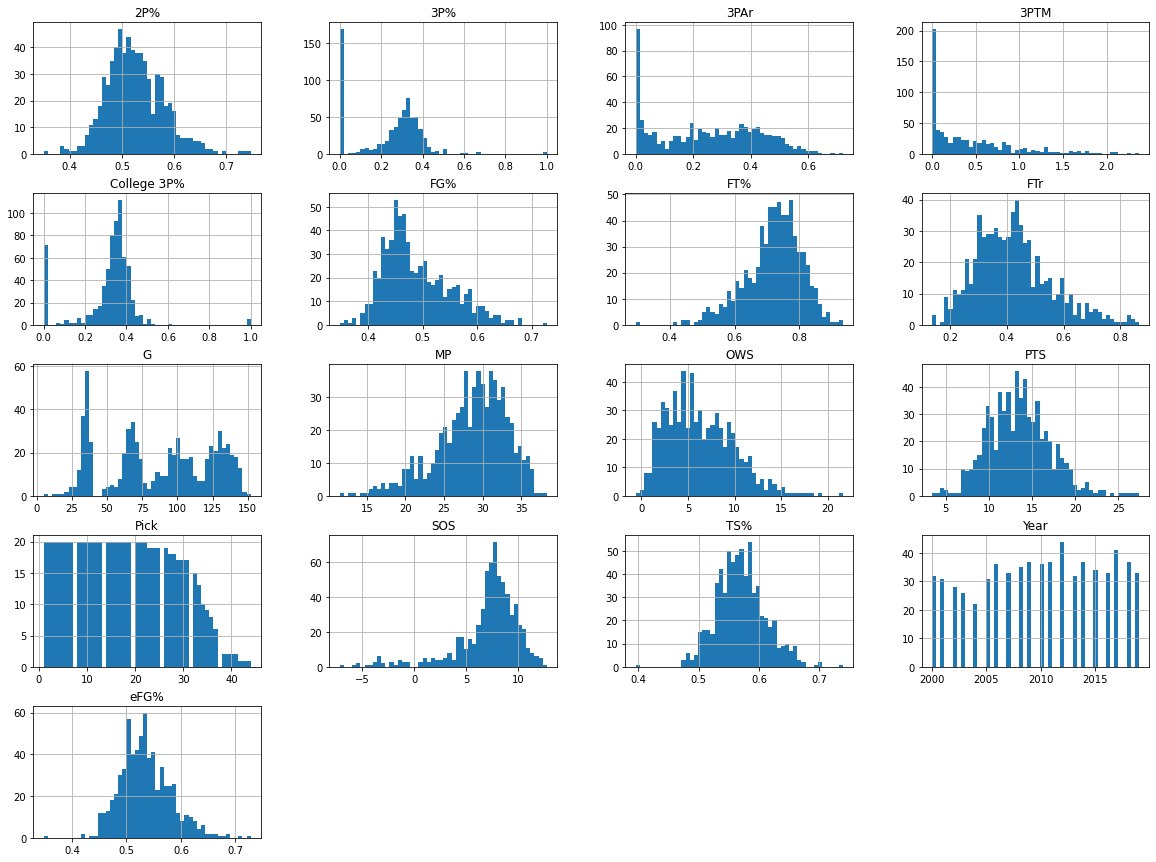

In [8]:
#Değişkenlerin histogramlarının incelenmesi
%matplotlib inline 
import matplotlib.pyplot as plt 
historical.hist(bins=50, figsize=(20,15)) 
plt.show()


2P%(İki sayı yüzdesi) değişkeninde aşağı yukarı normal bir dağılım görüyoruz. 3 sayı ile alakalı değişkenlerde 3 sayılık atış kullanmayan veya isabet bulamayan oyuncuların sıklığı sebebiyle 0 olan kısımda bir toplanma mevcut. 3P% ve College 3P% değişkenlerinde X ekseninin 1 değerine kadar uzamasına sebep olan aykırı değerler var. Bu aykırı değerler çok az sayıda üçlük kullanıp tesadüfen hepsinde isabet bulan oyunculardan oluşuyor fakat bu tesadüf de basketbolun doğasında bulunan, mümkünatı olan gözlemler olduğu için bu gözlemleri veri setinden atmıyoruz. Bunun haricinde 3P%'ın 0.1 ve 0.5 değerleri arasında aşağı yukarı normal dağıldığı, College 3P% değişkeninde ise hafif bir sola çarpıklık olduğu söylenebilir. 

FG%, yani şut isabeti değişkeninde bariz bir sağa çarpıklık, FT% yani serbest atış yüzdesi değişkeninde ise bariz bir sola çarpıklık mevcut. Bunlar haricinde modeli açıklamada en belirleyici olabilecek değişkenlerden FTr değişkeninin sağa çarpık olduğu gözüküyor. TS% ve eFG% değişkenlerinin dağılımı oldukça benzer, bu ikisinde de hafif bir sağa çarpıklık var.

Modeli tahmin etmekte kullanılabilecek bütün değişkenler incelendiğinde modelin doğruluğunu etkileyecek kadar normallikten uzak bir çarpıklık olmadığını söyleyebiliriz.

In [9]:
#Tahminini yapacağımız 3PTM(Maç başına üçlük isabeti) değişkeninin diğer değişkenlerle olan korelasyonunun incelenmesi
corr_matrix = historical.corr()
corr_matrix["3PTM"].sort_values(ascending = False)

3PTM           1.000000
3PAr           0.618413
3P%            0.582977
FT%            0.402333
College 3P%    0.347618
Year           0.263897
PTS            0.215394
MP             0.195996
OWS            0.071466
SOS            0.071328
TS%            0.064531
eFG%          -0.012722
G             -0.077775
2P%           -0.182225
Pick          -0.185688
FTr           -0.341911
FG%           -0.364557
Name: 3PTM, dtype: float64

<AxesSubplot:xlabel='Pick', ylabel='3PTM'>

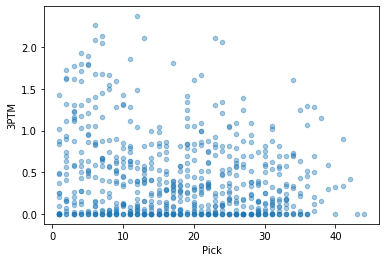

In [10]:
#Oyuncuların seçim sırası ve ilk senelerindeki üçlük isabeti arasındaki ilişkinin incelenmesi
historical.plot(kind = "scatter", x = "Pick", y = "3PTM", alpha = 0.4)

Draft'ta ön sıralarda seçilen oyuncuların daha çok süre alacağı ve daha çok üçlük isabeti bulacağı varsayımının doğrulandığını görüyoruz. Bu Pick değişkenin modele dahil edilmesini elzem kılıyor.

<AxesSubplot:xlabel='Year', ylabel='3PTM'>

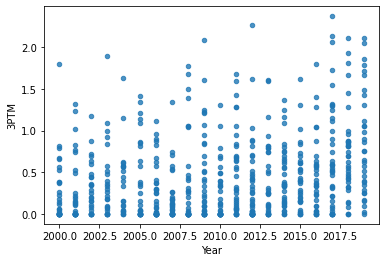

In [11]:
#Yıl ve oyuncuların ilk senesindeki üçlük isabeti arasındaki ilişkinin incelenmesi
historical.plot(kind = "scatter", x = "Year", y = "3PTM", alpha = 0.8)

Giriş kısmında bahsedilen oyun tarzının değişmesi ve artık basketbolda daha çok üçlük kullanılması durumu burada da göze çarpıyor. Özellikle 2014 yılından itibaren ligdeki ilk senesini geçiren oyuncuların daha çok üçlük isabeti bulmaya başladığını görüyoruz. Bunu hesaba katmak için Year değişkeni de modelde kullanılacak.

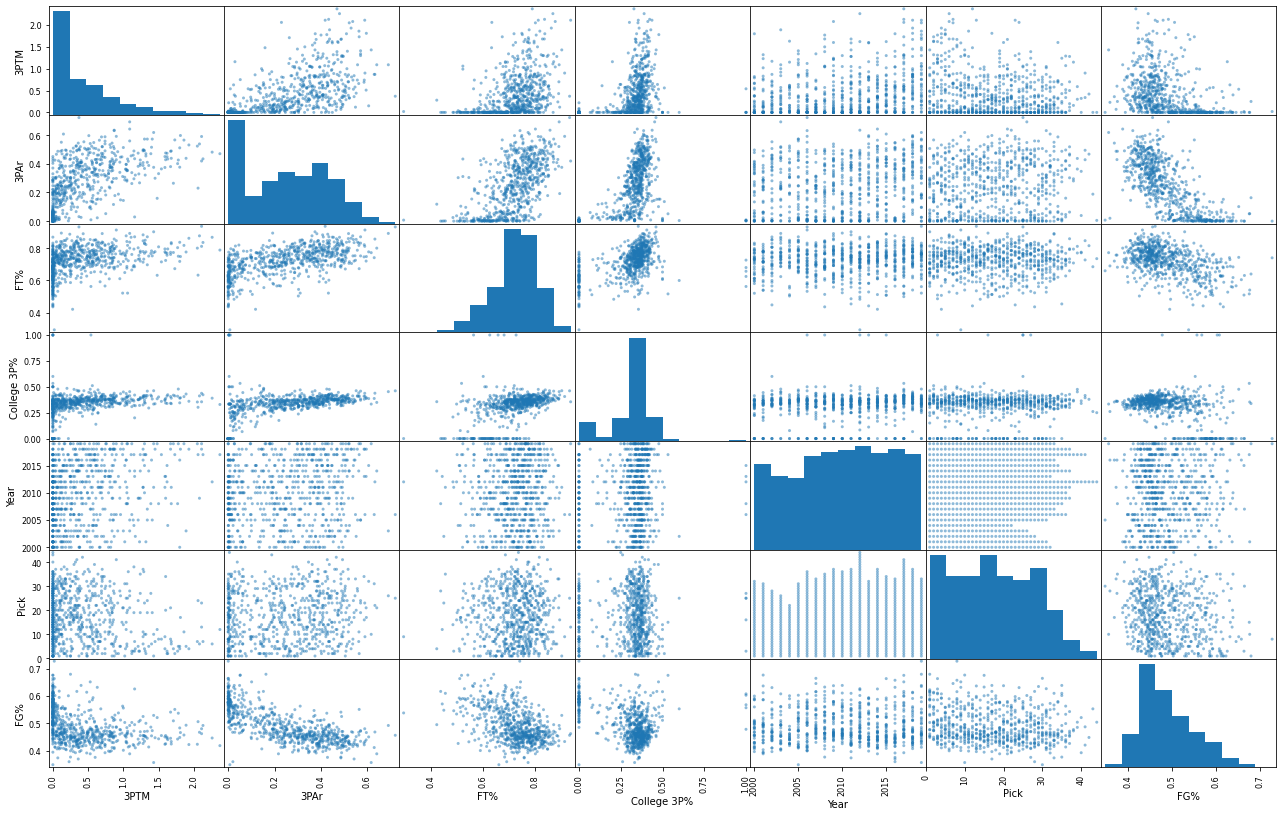

In [12]:
#Korelasyonlara göre modelde kullanılmasına karar verilen değişkenlerin birbiriyle olan ilişkisi
from pandas.plotting import scatter_matrix
attributes = ["3PTM", "3PAr", "FT%", "College 3P%", "Year", "Pick","FG%"]
scatter_matrix(historical[attributes], figsize = (22,14), alpha = 0.5)
plt.show()

3PTM-Year ve 3PTM-Pick arasındaki ilişkiyi zaten incelemiştik. Bu ikisi haricinde bakacak olursak 3PAr(Üçlük deneme sıklığı) arttıkça üçlük isabetinin de doğal olarak arttığı göze çarpıyor. FT%(Kolejdeki serbest atış yüzdesi) genelde NBA'de başarılı bir şutör olmanın en sağlıklı indikatörlerinden biri olarak kabul edilir, sebebini 3PTM-FT% arasındaki ilişkiyi inceleyince rahatlıkla görebiliyoruz. College 3P% arttıkça 3PTM değişkeninde keskin bir artış göze çarpıyor. Son olarak FG%(Şut isabeti) arttıkça 3PTM değişkeninin azaldığını görüyoruz. Bu negatif korelasyonun sebebi ise üç sayılık atışların iki sayılık atışlara göre daha düşük başarı isabeti olan bir şut oluşu. Oyunu üçlüğe daha çok dayanan oyuncuların şut yüzdesi doğal olarak daha düşük oluyor.

Özet olarak açıklama gücü oldukça yüksek değişkenler seçtiğimiz söylenebilir.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
#Variance Inflation Factor kontrolü
df = pd.DataFrame({'3PAr': historical["3PAr"],
                  'FT%': historical["FT%"],
                  'College 3P%': historical["College 3P%"],
                  'Year': historical["Year"],
                  'Pick': historical["Pick"],
                  'FG%': historical["FG%"],}
                 )

X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const          135025.211588
3PAr                2.821758
FT%                 1.624263
College 3P%         1.417094
Year                1.082974
Pick                1.052444
FG%                 2.222459
dtype: float64

Son olarak tahmin için kullanılacak değişkenler arasında bir multicollinearity olup olmadığını kontrol edildi. Bunun için varyans enflasyon faktörü kullanıldı ve bütün değerlerin yüksek korelasyon sınırı olan 5'ten düşük olduğu görüldü. 

In [14]:
#Değişkenler ve çıktı değişkeninin tanımlanması
features_1 = ['3PAr','FT%', 'College 3P%', 'Year', 'Pick', 'FG%']
output_1 = ['3PTM']

In [15]:
#N/a değerlerin veri setinden çıkartılması
historical_1 = historical.dropna(subset=features_1)

In [16]:
#Train ve test setlerinin oluşturulması
train_1, test_1 = train_test_split(historical_1, test_size = 0.20, random_state = 34)

# Tabakalı Örnekleme

Şutör ve şutör olmayan oyuncuların örneklemde gerçeğe uygun biçimde temsil edilmesini sağlamak ve modellerin açıklayıcı gücünü arttırmak amacıyla 3PTM çıktı değişkeninin tahmininde tabakalı örnekleme metodu kullanıldı.

<AxesSubplot:>

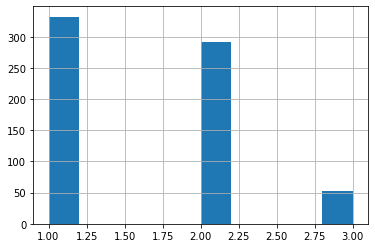

In [17]:
#Oyuncular üçlük deneme sıklıkları açısından üç kategoriye ayrıldı, oluşan yeni kategorik değişken veri setine eklendi.
historical_1["Willingness To Shoot"] = pd.cut(historical_1["3PAr"],
                                             bins = [-0.001,0.25,0.5,np.inf],
                                             labels = [1.0,2.0,3.0])
historical_1["Willingness To Shoot"].hist()

In [18]:
#Yeni eklenen değişkenin türünün kontrol edilmesi
historical_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 674
Data columns (total 21 columns):
Player                  675 non-null object
School                  675 non-null object
Year                    675 non-null int64
Pick                    675 non-null int64
Pos                     675 non-null object
G                       675 non-null int64
MP                      675 non-null float64
FG%                     675 non-null float64
2P%                     675 non-null float64
College 3P%             675 non-null float64
FT%                     675 non-null float64
PTS                     675 non-null float64
SOS                     675 non-null float64
TS%                     675 non-null float64
eFG%                    675 non-null float64
3PAr                    675 non-null float64
FTr                     675 non-null float64
OWS                     675 non-null float64
3PTM                    675 non-null float64
3P%                     675 non-null float64
Will

In [19]:
#Veri setinin güncel hali
historical_1

Player           School  Year  Pick Pos    G    MP  \
0               Kenyon Martin       Cincinnati  2000     1  PF  116  23.7   
1              Stromile Swift              LSU  2000     2  PF   50  26.6   
2                Marcus Fizer       Iowa State  2000     3  PF   97  32.9   
3                 Mike Miller          Florida  2000     4  SF   65  26.7   
4             DerMarr Johnson       Cincinnati  2000     5  SF   32  27.5   
5                  Chris Mihm            Texas  2000     6   C   96  31.4   
6              Jamal Crawford         Michigan  2000     7  PG   17  33.9   
7              Joel Przybilla        Minnesota  2000     8   C   49  27.6   
8               Keyon Dooling         Missouri  2000     9  PG   59  28.1   
9                Jerome Moiso             UCLA  2000    10   C   62  26.8   
10                Etan Thomas         Syracuse  2000    11   C  122  26.0   
11         Courtney Alexander     Fresno State  2000    12  PG  112  30.9   
12             Mateen Cleaves   Michigan State  2000    13  PG  123  29.6   
13              Jason Collier     Georgia Tech  2000    14   C   97  29.6   
14              Desmond Mason   Oklahoma State  2000    15  SF  129  30.0   
15         Quentin Richardson           DePaul  2000    16  SG   64  34.2   
16            Jamaal Magloire         Kentucky  2000    17   C  145  21.2   
17             Speedy Claxton          Hofstra  2000    18  PG  119  33.8   
18            Morris Peterson   Michigan State  2000    19  SG  137  23.4   
19             Donnell Harvey          Florida  2000    20  PF   37  20.2   
20            Mamadou N'Diaye           Auburn  2000    21   C  128  20.8   
21              Erick Barkley  St. John's (NY)  2000    22  PG   65  34.8   
22                Mark Madsen         Stanford  2000    23  PF  108  24.8   
23                 Dan Langhi       Vanderbilt  2000    24  PF  121  24.4   
24                A.J. Guyton          Indiana  2000    25  PG  128  34.0   
25             Khalid El-Amin            Uconn  2000    26  PG  108  30.1   
26                 Mike Smith        Louisiana  2000    27  SG   55  35.2   
27                Eddie House    Arizona State  2000    28  PG  124  33.4   
28             Eduardo Najera         Oklahoma  2000    29  SF  126  30.6   
29              Lavor Postell  St. John's (NY)  2000    30  SF  129  29.3   
..                        ...              ...   ...   ...  ..  ...   ...   
645            DeAndre Hunter         Virginia  2019     4  SF   71  26.6   
646            Darius Garland       Vanderbilt  2019     5  PG    5  27.8   
647            Jarrett Culver       Texas Tech  2019     6  SG   75  29.5   
648                Coby White   North Carolina  2019     7  PG   35  28.5   
649              Jaxson Hayes            Texas  2019     8   C   32  23.3   
650             Rui Hachimura          Gonzaga  2019     9  PF  102  19.7   
651           Cameron Reddish             Duke  2019    10  SF   36  29.7   
652           Cameron Johnson              UNC  2019    11  SF  135  25.4   
653           P.J. Washington         Kentucky  2019    12  PF   72  28.3   
654               Tyler Herro         Kentucky  2019    13  SG   37  32.6   
655            Romeo Langford          Indiana  2019    14  SG   32  34.1   
656  Nickeil Alexander-Walker    Virginia Tech  2019    15  SG   67  29.9   
657          Matisse Thybulle       Washington  2019    16  SG  135  29.4   
658            Brandon Clarke          Gonzaga  2019    17  PF   98  27.8   
659            Grant Williams        Tennessee  2019    18  PF  104  28.9   
660                 Ty Jerome         Virginia  2019    19  PG  105  26.4   
661             Nassir Little   North Carolina  2019    20  SF   36  18.2   
662             Dylan Windler          Belmont  2019    21  SG  128  29.4   
663         Mfiondu Kabengele      Florida St.  2019    22  PF   71  18.3   
664              Jordan Poole         Michigan  2019    23  SG   75  22.7   
665            Keld

In [20]:
#Train ve test setleri için tabakalı örnekleme uygulandı
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=34)
for train_index, test_index in split.split(historical_1, historical_1["Willingness To Shoot"]):
    strat_train_1 = historical_1.loc[train_index]
    strat_test_1 = historical_1.loc[test_index]

In [21]:
strat_test_1["Willingness To Shoot"].value_counts() / len(strat_test_1)

1.0    0.488889
2.0    0.429630
3.0    0.081481
Name: Willingness To Shoot, dtype: float64

Tabakalı örnekleme sonucu test setindeki üçlük atma eğilimi yüksek oyuncu sayısının gerçek oranlara göre dağıtıldığını görüyoruz.

In [22]:
#İşi biten Willingness To Shoot kategorik değişkeni veri setinden atıldı
for set_ in (strat_train_1, strat_test_1):
    set_.drop("Willingness To Shoot", axis=1, inplace=True)

In [23]:
#Train ve test setleri tabakalanmış veri setine göre tekrar oluşturuldu.
xtrain_1 = strat_train_1[features_1]
ytrain_1 = strat_train_1[output_1]

xtest_1 = strat_test_1[features_1]
ytest_1 = strat_test_1[output_1]

xtrain_1

3PAr    FT%  College 3P%  Year  Pick    FG%
604  0.428  0.846        0.416  2017    41  0.487
120  0.352  0.755        0.335  2004     4  0.438
501  0.297  0.742        0.371  2015     5  0.446
328  0.304  0.545        0.375  2010    18  0.432
586  0.223  0.760        0.376  2017    23  0.501
500  0.000  0.508        0.000  2015     4  0.593
571  0.364  0.715        0.359  2017     8  0.455
246  0.331  0.808        0.402  2008     8  0.443
489  0.052  0.641        0.300  2014    30  0.486
674  0.180  0.607        0.327  2019    33  0.552
19   0.004  0.610        0.000  2000    20  0.507
104  0.040  0.757        0.327  2003    14  0.531
423  0.039  0.775        0.364  2012    40  0.521
523  0.044  0.533        0.275  2015    27  0.586
542  0.366  0.800        0.422  2016    12  0.431
326  0.192  0.893        0.421  2010    16  0.480
218  0.139  0.701        0.438  2007    13  0.528
484  0.322  0.767        0.313  2014    25  0.450
617  0.342  0.743        0.291  2018    13  0.444
51   0.288  0.779        0.345  2001    20  0.471
590  0.401  0.720        0.389  2017    27  0.511
537  0.178  0.682        0.350  2016     7  0.530
268  0.179  0.716        0.277  2008    30  0.464
238  0.245  0.640        0.330  2007    33  0.461
615  0.413  0.776        0.375  2018    11  0.470
223  0.031  0.751        0.308  2007    18  0.548
281  0.098  0.646        0.167  2009     8  0.523
618  0.144  0.717        0.450  2018    14  0.556
29   0.246  0.789        0.326  2000    30  0.430
27   0.381  0.798        0.366  2000    28  0.425
..     ...    ...          ...   ...   ...    ...
73   0.359  0.850        0.389  2002    11  0.468
481  0.523  0.840        0.389  2014    22  0.433
476  0.007  0.513        0.000  2014    17  0.588
110  0.244  0.774        0.369  2003    20  0.434
653  0.159  0.632        0.384  2019    12  0.521
487  0.028  0.619        0.222  2014    28  0.467
82   0.553  0.854        0.462  2002    20  0.451
8    0.365  0.733        0.338  2000     9  0.411
14   0.275  0.731        0.372  2000    15  0.486
426  0.188  0.685        0.261  2012    43  0.553
312  0.139  0.758        0.362  2010     2  0.502
356  0.134  0.660        0.358  2011    10  0.555
411  0.227  0.714        0.325  2012    28  0.412
548  0.000  0.715        0.000  2016    18  0.577
427  0.005  0.735        0.250  2012    44  0.504
563  0.285  0.613        0.292  2016    33  0.415
11   0.259  0.767        0.362  2000    12  0.456
127  0.405  0.786        0.365  2004    11  0.454
230  0.198  0.636        0.307  2007    25  0.480
239  0.239  0.712        0.337  2008     1  0.477
631  0.471  0.798        0.355  2018    27  0.407
340  0.207  0.750        0.289  2010    30  0.467
662  0.487  0.761        0.406  2019    21  0.541
249  0.071  0.667        0.291  2008    11  0.526
596  0.028  0.630        0.188  2017    33  0.610
650  0.095  0.746        0.316  2019     9  0.579
84   0.377  0.687        0.340  2002    22  0.440
232  0.201  0.815        0.341  2007    27  0.532
455  0.383  0.780        0.302  2013    28  0.426
314  0.367  0.768        0.349  2010     4  0.454

[540 rows x 6 columns]

In [24]:
#R^2, MSE, çapraz doğrulama skorları ve standart sapmalarını bir arada gösteren bir scores fonksiyonu yazıldı
def scores(model):
    
    model.fit(xtrain_1, ytrain_1.values.ravel())
    y_pred_1 = model.predict(xtest_1)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest_1, y_pred_1))
    print('R2 score: %.3f' % r2_score(ytest_1, y_pred_1))

    cv_score_1 = cross_val_score(model, xtest_1,ytest_1.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cv_score_1.mean(), cv_score_1.std() * 2))
    
    y_results_1 = []
    
    for i in y_pred_1:
        y_results_1.append(i)
        
    return(y_results_1)

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [8, 10, 12, 15, 16, 18, 20, 22, 24, 26, 28, 30],
    'max_features': ['auto'],
    'max_depth' : [5,7,9,11,13,15],
}
    
rf_1 = RandomForestRegressor()

grid_search = GridSearchCV(estimator= rf_1, param_grid=param_grid, cv= 3)

grid_search.fit(xtrain_1, ytrain_1.values.ravel())
grid_search.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 22}

Random Forest modelinin en iyi parametrelerinin seçimi için Grid Search yöntemi kullanıldı fakat bu parametreler ile çapraz doğrulama skorları R2'e kıyasla oldukça düşük çıktı. Olası bir aşırı öğrenmenin önüne geçmek için parametrelerin manuel seçilmesinde karar kılındı.

In [26]:
lin_reg_1 = LinearRegression()
y_lin_reg_1 = scores(lin_reg_1)

rf_1 = RandomForestRegressor(random_state = 0, max_features = 'auto', n_estimators = 15, max_depth = 7)
y_rf_1 = scores(rf_1)

elastic_net_1 = ElasticNetCV()
y_elastic_net_1 = scores(elastic_net_1)

svr_1 = SVR(kernel = 'rbf', gamma= 0.002, epsilon = 0.05, C = 1500)
y_svr_1 = scores(svr_1)

Mean squared error: 0.097
R2 score: 0.482
R2 cross validation score: 0.42 (+/- 0.23)
Mean squared error: 0.091
R2 score: 0.514
R2 cross validation score: 0.45 (+/- 0.23)
Mean squared error: 0.095
R2 score: 0.494
R2 cross validation score: 0.43 (+/- 0.22)
Mean squared error: 0.088
R2 score: 0.532
R2 cross validation score: 0.42 (+/- 0.24)


Basketbol veri ile ölçülemeyen değişkenlerin etkisinin çok fazla olduğu bir spor. İlk senesindeki oyuncuların alacağı süreleri etkileyen fakat modele ekleyemediğimiz çok sayıda etken mevcut. Örneğin oyuncunun draft edildiği takımda aynı pozisyonda oynayan oyuncu sayısı, koçların tecrübesiz ve genç oyunculara süre verme eğiliminin değişkenliği, takımın şampiyonluk umutlarına olan uzaklığı, takım arkadaşlarının bencillik seviyesi...

Bu tarz birçok değişkenin hesaba katılamayan etkisini göz önünde bulundurursak elde ettiğimiz R2 ve çapraz doğrulama skorlarının hiç de fena olmadığı, modellerin açıklayıcı gücünün oldukça fazla olduğu yönünde bir yorum yapılabilir. En iyi performans ise Random Forest ve Support Vector Regression'da elde edildi.

In [27]:
#Artık fonksiyonu yazıldı
def residuals(x):
    
    resid_1 = [i for i in (ytest_1['3PTM'] - x)]
    ssr_1 = [i ** 2 for i in resid_1]
    
    ssr_sum_1 = 0
    for i in ssr_1:
        ssr_sum_1 += i
        
    stand_resid_1 = []
    for i in resid_1:
        stand_resid_1.append(i / ((ssr_sum_1 / (ytest_1.shape[0] - 2)) ** (1/2)))
    
    resid_list_1 = []
    
    for i in stand_resid_1:
        resid_list_1.append(i)
        
    return resid_list_1

In [28]:
#Artık fonksiyonu tahminleme modellerine uygulandı
lin_reg_1_resid = residuals(y_lin_reg_1)
rf_1_resid = residuals(y_rf_1)
elastic_net_1_resid = residuals(y_elastic_net_1)
svr_1_resid = residuals(y_svr_1)

(array([ 2.,  5.,  8., 32., 37., 26., 13.,  4.,  4.,  4.]),
 array([-2.58489063, -2.02224172, -1.45959282, -0.89694391, -0.334295  ,
         0.2283539 ,  0.79100281,  1.35365172,  1.91630063,  2.47894953,
         3.04159844]),
 <BarContainer object of 10 artists>)

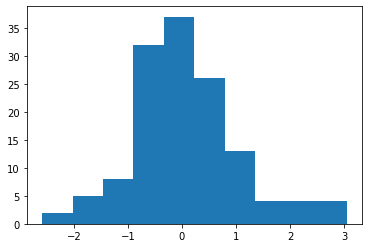

In [29]:
plt.hist(lin_reg_1_resid)

(array([ 1.,  1.,  5.,  6., 21., 60., 18., 15.,  5.,  3.]),
 array([-3.76154271, -3.10579296, -2.45004322, -1.79429347, -1.13854373,
        -0.48279398,  0.17295576,  0.82870551,  1.48445525,  2.140205  ,
         2.79595474]),
 <BarContainer object of 10 artists>)

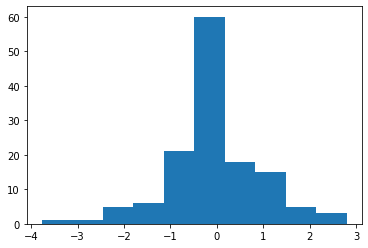

In [30]:
plt.hist(rf_1_resid)

(array([ 2.,  4., 10., 34., 39., 24., 10.,  5.,  4.,  3.]),
 array([-2.57951166, -2.01211224, -1.44471281, -0.87731339, -0.30991396,
         0.25748546,  0.82488489,  1.39228431,  1.95968373,  2.52708316,
         3.09448258]),
 <BarContainer object of 10 artists>)

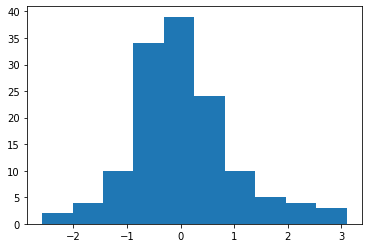

In [31]:
plt.hist(elastic_net_1_resid)

(array([ 2.,  4.,  8., 24., 53., 22., 10.,  4.,  6.,  2.]),
 array([-2.53413787, -1.944331  , -1.35452413, -0.76471725, -0.17491038,
         0.41489649,  1.00470336,  1.59451024,  2.18431711,  2.77412398,
         3.36393086]),
 <BarContainer object of 10 artists>)

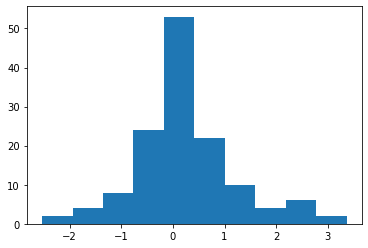

In [32]:
plt.hist(svr_1_resid)

Dört modelde de artıkların genel olarak -2 ve 3 aralığında dağıldığını görüyoruz. Dağılımlarında hafif çarpıklıklar söz konusu olsa da çok net bir çarpıklık göze çarpmıyor.

In [33]:
#Aykırı değer tespiti için outliers fonksiyonu yazıldı.
def outliers(x):
    
    np_list_1 = np.array(x)
    stdev_1 = np.std(np_list_1)
    mean_1 = np.mean(np_list_1)

    outliers_1 = 0
    for i in x:
        if i < mean_1 - 2 * stdev_1:
            outliers_1 += 1
        elif i > mean_1 + 2 * stdev_1:
            outliers_1 += 1

    outlier_percent_1 = 1 - outliers_1 / ytest_1.shape[0]
    outlier_string_1 = "{:.3%}".format(outlier_percent_1)
    
    return outlier_string_1

# Veri Görselleştirme

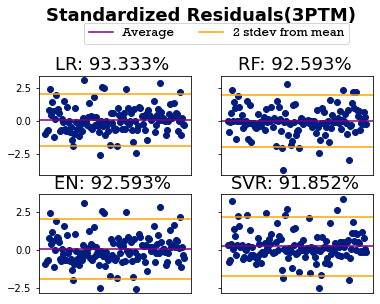

In [34]:
#Aykırı değerlerin görselleştirilmesi 
plt.style.use('seaborn-dark-palette')

resid_fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = 'row')

x = np.arange(ytest_1.shape[0])
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax4.xaxis.set_visible(False)

ax1.scatter(x, lin_reg_1_resid)
ax1.axhline(y = np.mean(lin_reg_1_resid), label = "Average", color = 'purple')
ax1.axhline(y = np.mean(lin_reg_1_resid) - 2 * np.std(lin_reg_1_resid), color = 'orange')
ax1.axhline(y = np.mean(lin_reg_1_resid) + 2 * np.std(lin_reg_1_resid), label = "2 stdev from mean", color = 'orange')
ax1.set_title("LR: %s" % outliers(lin_reg_1_resid), size = 18, x = .485, ha = 'center')

ax2.scatter(x, rf_1_resid)
ax2.axhline(y = np.mean(rf_1_resid), color = 'purple')
ax2.axhline(y = np.mean(rf_1_resid) - 2 * np.std(rf_1_resid), color = 'orange')
ax2.axhline(y = np.mean(rf_1_resid) + 2 * np.std(rf_1_resid), color = 'orange')
ax2.set_title("RF: %s" % outliers(rf_1_resid), size = 18, x = .485, ha = 'center')

ax3.scatter(x, elastic_net_1_resid)
ax3.axhline(y = np.mean(elastic_net_1_resid), color = 'purple')
ax3.axhline(y = np.mean(elastic_net_1_resid) - 2 * np.std(elastic_net_1_resid), color = 'orange')
ax3.axhline(y = np.mean(elastic_net_1_resid) + 2 * np.std(elastic_net_1_resid), color = 'orange')
ax3.set_title("EN: %s" % outliers(elastic_net_1_resid), size = 18, x = .485, ha = 'center')

ax4.scatter(x, svr_1_resid)
ax4.axhline(y = np.mean(svr_1_resid), color = 'purple')
ax4.axhline(y = np.mean(svr_1_resid) - 2 * np.std(svr_1_resid), color = 'orange')
ax4.axhline(y = np.mean(svr_1_resid) + 2 * np.std(svr_1_resid), color = 'orange')
ax4.set_title("SVR: %s" % outliers(svr_1_resid), size = 18, x = .485, ha = 'center')

resid_fig.legend(loc = (.22, .855), ncol=2, prop={'size': 12, "family": "Rockwell"})

resid_fig.suptitle("Standardized Residuals(3PTM)", weight = 'bold', size = 18, y = 1.12)

ax1.yaxis.set_ticks([-2.5, 0, 2.5])
ax3.yaxis.set_ticks([-2.5, 0, 2.5])



Standardize edilmiş artık testinde bütün modellerde oldukça fazla aykırı değer olduğunu, hataların rastgeleliğinin bu durumdan etkilendiğini ve normallik için gereken 95% koşulunun küçük farklarla sağlanmadığını görüyoruz. Draftların ve oyuncu performanslarının rastgeleliği yüksek doğası fazla sayıda aykırı değerin ortaya çıkmasına sebep olmuş olabilir. Normallik varsayımıyla devam edip etmeyeceğimize karar vermek için bir QQ Plot'tan yararlanıyoruz.

Text(0.01, 0.5, 'Ordered Values')

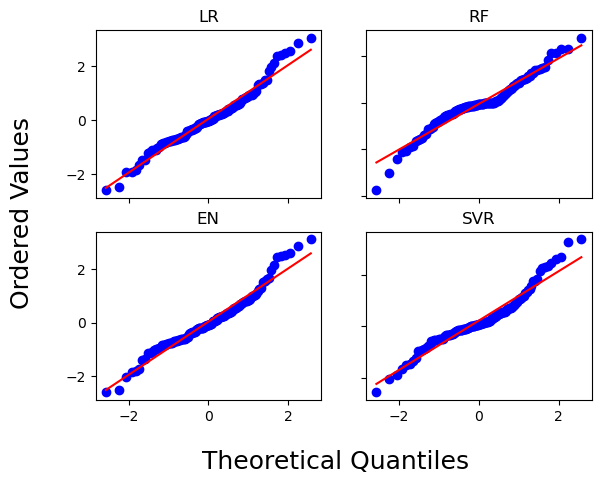

In [35]:
#QQ Plot çizildi.
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-dark-palette')

qqplot = plt.figure()

ax1 = qqplot.add_subplot(221)
stats.probplot(lin_reg_1_resid, dist="norm", plot=plt)
ax1.set_xlabel("")
ax1.set_xticklabels([])
ax1.set_ylabel("")
ax1.set_title("LR")

ax2 = qqplot.add_subplot(222)
stats.probplot(rf_1_resid, dist="norm", plot=plt)
ax2.set_xlabel("")
ax2.set_xticklabels([])
ax2.set_ylabel("")
ax2.set_title("RF")
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3 = qqplot.add_subplot(223)
stats.probplot(elastic_net_1_resid, dist="norm", plot=plt)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title("EN")

ax4 = qqplot.add_subplot(224)
stats.probplot(svr_1_resid, dist = "norm", plot = plt)
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.set_title("SVR")
ax4.set_yticklabels([])

qqplot.text(0.5, -0.02, 'Theoretical Quantiles', ha='center', va='center', size = 18)
qqplot.text(0.01, 0.5, 'Ordered Values', ha='center', va='center', rotation='vertical', size = 18)


QQ Plot'a göre hataların dağılımı teorik çeyrekliklerin büyük bir kısmında aşağı yukarı normal olmasına rağmen uç kısımlara yaklaştıkça normallikten sapma eğilimi gösteriyor. Özellikle teorik çeyrekliklere göre 2 olması gerekirken daha büyük değere sahip olan hatalar göze çarpıyor. Bunun haricinde tek kayda değer sapma Random Forest modelinde -2 teorik değeri civarında gözüküyor.

Standardize edilmiş artıklar ve QQ Plot'tan yola çıkarak normallik varsayımıyla devam edilmesi, aykırı değer fazlalığını hesaba katmak için ekstra bir yöntem kullanılmamasına karar verildi. Bu kararda projenin amacının aykırı gözlem statüsündeki oyuncu performanslarını daha isabetli tahmin etmek değil, en çok oyuncuyu en çok isabetle tahmin etmek oluşu etkili oldu.

# Maç Başı Üçlük İsabeti Tahminleme

In [36]:
curr_pred_1 = current[features_1]

#Farklı tahminleme modellerinin kullanımını pratikleştirme adına predict fonksiyonu yazıldı
def predict(model):
    
    y_pred_1 = model.predict(curr_pred_1)
    
    for i, j in zip(current['Player'], y_pred_1):
        print(i, j)
        
    return y_pred_1

#Lineer Regresyon 3PTM tahmini
lin_reg_1_pred= predict(lin_reg_1)

Anthony Edwards 1.1509903217120367
James Wiseman 0.5801084585179481
Patrick Williams 0.7680249567085511
Isaac Okoro 0.817482435722809
Onyeka Okongwu 0.41464057931099774
Obi Toppin 0.6643618229302675
Jalen Smith 0.7487491813799991
Devin Vassell 0.9727315112361836
Tyrese Haliburton 1.2992185553724127
Kira Lewis 0.8927902050879908
Aaron Nesmith 1.2577441087157197
Cole Anthony 0.8674064934797769
Isaiah Stewart 0.38271568496438846
Josh Green 0.6747297035631092
Saddiq Bey 1.05959290177843
Precious Achiuwa 0.3238746524367144
Tyrese Maxey 0.7136874727587852
Zeke Nnaji 0.31204273895411205
Immanuel Quickley 0.9813846582714163
Payton Pritchard 0.9971662470262075
Udoka Azubuike 0.17433417811044194
Jaden McDaniels 0.7151402747608557
Malachi Flynn 1.0254281524978879
Desmond Bane 0.8676068378102997
Tyrell Terry 0.8868909435317107
Vernon Carey Jr. 0.20842712413459452
Daniel Oturu 0.21059715065539564
Xavier Tillman Sr. 0.3083009553224585
Elijah Hughes 0.9400856652618188
Robert Woodard II 0.432159176918

In [37]:
#Random Forest 3PTM tahmini
rf_1_pred = predict(rf_1)

Anthony Edwards 1.8367134920634922
James Wiseman 0.14827806267806268
Patrick Williams 0.5899996114996114
Isaac Okoro 1.1436296296296298
Onyeka Okongwu 0.15785616513116513
Obi Toppin 0.7773189033189033
Jalen Smith 0.7691111111111112
Devin Vassell 1.2186577681577684
Tyrese Haliburton 1.6632473304473303
Kira Lewis 0.48562984780122076
Aaron Nesmith 1.2372682058682059
Cole Anthony 0.5288851388065118
Isaiah Stewart 0.14001725589225592
Josh Green 0.5196626842041163
Saddiq Bey 1.2188776471276472
Precious Achiuwa 0.5827801075268817
Tyrese Maxey 0.4225282596378598
Zeke Nnaji 0.1428054427054427
Immanuel Quickley 0.6872220397720399
Payton Pritchard 0.6217964381788462
Udoka Azubuike 0.009236752136752137
Jaden McDaniels 0.44932303054440353
Malachi Flynn 0.501319265129924
Desmond Bane 0.78406508946559
Tyrell Terry 0.6735320445820445
Vernon Carey Jr. 0.03241481481481482
Daniel Oturu 0.030252329749103947
Xavier Tillman Sr. 0.4168730158730158
Elijah Hughes 0.7004998753227191
Robert Woodard II 0.53883333

In [38]:
#Elastic Net 3PTM tahmini
elastic_net_1_pred = predict(elastic_net_1)

Anthony Edwards 1.1722964543119758
James Wiseman 0.4484403268131132
Patrick Williams 0.7964026179790338
Isaac Okoro 0.8161708249540496
Onyeka Okongwu 0.3973664435591857
Obi Toppin 0.5985662290221754
Jalen Smith 0.7473521632722964
Devin Vassell 0.9663907897231425
Tyrese Haliburton 1.2229518431905362
Kira Lewis 0.9029667090999922
Aaron Nesmith 1.219574305314417
Cole Anthony 0.9210360111405009
Isaiah Stewart 0.37774814985544225
Josh Green 0.7208553608094093
Saddiq Bey 1.0311213529601702
Precious Achiuwa 0.3836810723168753
Tyrese Maxey 0.741002302717078
Zeke Nnaji 0.30878929317722026
Immanuel Quickley 0.9818453751064169
Payton Pritchard 0.9799401109594754
Udoka Azubuike 0.09588780769268368
Jaden McDaniels 0.7526595338867637
Malachi Flynn 1.0059455070765466
Desmond Bane 0.8251788298451501
Tyrell Terry 0.8653927056894943
Vernon Carey Jr. 0.2082039054391842
Daniel Oturu 0.21938335125692987
Xavier Tillman Sr. 0.2832430829487578
Elijah Hughes 0.930635610046977
Robert Woodard II 0.45474531373938

In [39]:
#Support Vector Regression 3PTM tahmini
svr_1_pred = predict(svr_1)

Anthony Edwards 1.2761525051662974
James Wiseman 0.01141047905372572
Patrick Williams 1.0025474094548517
Isaac Okoro 1.0519050356609259
Onyeka Okongwu 0.4491772491795163
Obi Toppin 0.883668116182267
Jalen Smith 1.0699003638326903
Devin Vassell 1.390184481393422
Tyrese Haliburton 1.7377268722687549
Kira Lewis 1.2097653652670632
Aaron Nesmith 1.5784158784327391
Cole Anthony 1.0861517456249348
Isaiah Stewart 0.4881417149345597
Josh Green 0.8238856846615508
Saddiq Bey 1.154262635832143
Precious Achiuwa 0.45248007713695726
Tyrese Maxey 0.8388269366053609
Zeke Nnaji 0.47043680486337136
Immanuel Quickley 1.094799245260393
Payton Pritchard 1.1068047001846852
Udoka Azubuike 0.3618931132091947
Jaden McDaniels 0.8866271448924326
Malachi Flynn 1.125734552441887
Desmond Bane 0.9697645659699137
Tyrell Terry 0.9519108844215824
Vernon Carey Jr. 0.35729855354981366
Daniel Oturu 0.3236618897848902
Xavier Tillman Sr. 0.3293490481400485
Elijah Hughes 0.8859484856530488
Robert Woodard II 0.4383864043434218

In [40]:
#Modelin nadir de olsa negatif değerlerde tahmin yapabildiği göze çarpıyor. Negatif değerler 0'a çevrildi.
lin_reg_pos_pred = [0 if i < 0 else i for i in lin_reg_1_pred]
rf_pos_pred = [0 if i < 0 else i for i in rf_1_pred]
elastic_net_pos_pred = [0 if i < 0 else i for i in elastic_net_1_pred]
svr_pos_pred = [0 if i < 0 else i for i in svr_1_pred]

In [41]:
#3PTM tahminleri için Dataframe oluşturuldu.
player_names = current['Player']

draft_2020_3pm = pd.DataFrame(
    {'Player Name': player_names,
     'LR 3PM': lin_reg_pos_pred,
     'RF 3PM': rf_pos_pred,
     'EN 3PM': elastic_net_pos_pred,
     'SVR 3PM': svr_pos_pred
    })

draft_2020_3pm

Player Name    LR 3PM    RF 3PM    EN 3PM   SVR 3PM
0      Anthony Edwards  1.150990  1.836713  1.172296  1.276153
1        James Wiseman  0.580108  0.148278  0.448440  0.011410
2     Patrick Williams  0.768025  0.590000  0.796403  1.002547
3          Isaac Okoro  0.817482  1.143630  0.816171  1.051905
4       Onyeka Okongwu  0.414641  0.157856  0.397366  0.449177
5           Obi Toppin  0.664362  0.777319  0.598566  0.883668
6          Jalen Smith  0.748749  0.769111  0.747352  1.069900
7        Devin Vassell  0.972732  1.218658  0.966391  1.390184
8    Tyrese Haliburton  1.299219  1.663247  1.222952  1.737727
9           Kira Lewis  0.892790  0.485630  0.902967  1.209765
10       Aaron Nesmith  1.257744  1.237268  1.219574  1.578416
11        Cole Anthony  0.867406  0.528885  0.921036  1.086152
12      Isaiah Stewart  0.382716  0.140017  0.377748  0.488142
13          Josh Green  0.674730  0.519663  0.720855  0.823886
14          Saddiq Bey  1.059593  1.218878  1.031121  1.154263
15    Precious Achiuwa  0.323875  0.582780  0.383681  0.452480
16        Tyrese Maxey  0.713687  0.422528  0.741002  0.838827
17          Zeke Nnaji  0.312043  0.142805  0.308789  0.470437
18   Immanuel Quickley  0.981385  0.687222  0.981845  1.094799
19    Payton Pritchard  0.997166  0.621796  0.979940  1.106805
20      Udoka Azubuike  0.174334  0.009237  0.095888  0.361893
21     Jaden McDaniels  0.715140  0.449323  0.752660  0.886627
22       Malachi Flynn  1.025428  0.501319  1.005946  1.125735
23        Desmond Bane  0.867607  0.784065  0.825179  0.969765
24        Tyrell Terry  0.886891  0.673532  0.865393  0.951911
25    Vernon Carey Jr.  0.208427  0.032415  0.208204  0.357299
26        Daniel Oturu  0.210597  0.030252  0.219383  0.323662
27  Xavier Tillman Sr.  0.308301  0.416873  0.283243  0.329349
28       Elijah Hughes  0.940086  0.700500  0.930636  0.885948
29   Robert Woodard II  0.432159  0.538833  0.454745  0.438386
30           Tre Jones  0.483109  0.420994  0.524007  0.402159
31       Nick Richards  0.062790  0.440755  0.025268  0.000000
32     Jahmi'us Ramsey  0.648669  0.625356  0.662655  0.570083
33        Jordan Nwora  0.749273  0.889372  0.733910  0.581668
34         C.J. Elleby  0.586409  0.549664  0.612300  0.497286
35          Isaiah Joe  1.230147  0.945171  1.177365  1.021256
36         Sam Merrill  0.839089  1.144848  0.782910  0.729444

In [42]:
#Dört farklı tahminleme metodunun ortalama değeri Dataframe'e eklendi.
mean_3pm = ((draft_2020_3pm["LR 3PM"] + 
            draft_2020_3pm["RF 3PM"] + 
            draft_2020_3pm["EN 3PM"] +
            draft_2020_3pm["SVR 3PM"])/4)
draft_2020_3pm["Mean 3PM"] = mean_3pm

draft_2020_3pm

Player Name    LR 3PM    RF 3PM    EN 3PM   SVR 3PM  Mean 3PM
0      Anthony Edwards  1.150990  1.836713  1.172296  1.276153  1.359038
1        James Wiseman  0.580108  0.148278  0.448440  0.011410  0.297059
2     Patrick Williams  0.768025  0.590000  0.796403  1.002547  0.789244
3          Isaac Okoro  0.817482  1.143630  0.816171  1.051905  0.957297
4       Onyeka Okongwu  0.414641  0.157856  0.397366  0.449177  0.354760
5           Obi Toppin  0.664362  0.777319  0.598566  0.883668  0.730979
6          Jalen Smith  0.748749  0.769111  0.747352  1.069900  0.833778
7        Devin Vassell  0.972732  1.218658  0.966391  1.390184  1.136991
8    Tyrese Haliburton  1.299219  1.663247  1.222952  1.737727  1.480786
9           Kira Lewis  0.892790  0.485630  0.902967  1.209765  0.872788
10       Aaron Nesmith  1.257744  1.237268  1.219574  1.578416  1.323251
11        Cole Anthony  0.867406  0.528885  0.921036  1.086152  0.850870
12      Isaiah Stewart  0.382716  0.140017  0.377748  0.488142  0.347156
13          Josh Green  0.674730  0.519663  0.720855  0.823886  0.684783
14          Saddiq Bey  1.059593  1.218878  1.031121  1.154263  1.115964
15    Precious Achiuwa  0.323875  0.582780  0.383681  0.452480  0.435704
16        Tyrese Maxey  0.713687  0.422528  0.741002  0.838827  0.679011
17          Zeke Nnaji  0.312043  0.142805  0.308789  0.470437  0.308519
18   Immanuel Quickley  0.981385  0.687222  0.981845  1.094799  0.936313
19    Payton Pritchard  0.997166  0.621796  0.979940  1.106805  0.926427
20      Udoka Azubuike  0.174334  0.009237  0.095888  0.361893  0.160338
21     Jaden McDaniels  0.715140  0.449323  0.752660  0.886627  0.700937
22       Malachi Flynn  1.025428  0.501319  1.005946  1.125735  0.914607
23        Desmond Bane  0.867607  0.784065  0.825179  0.969765  0.861654
24        Tyrell Terry  0.886891  0.673532  0.865393  0.951911  0.844432
25    Vernon Carey Jr.  0.208427  0.032415  0.208204  0.357299  0.201586
26        Daniel Oturu  0.210597  0.030252  0.219383  0.323662  0.195974
27  Xavier Tillman Sr.  0.308301  0.416873  0.283243  0.329349  0.334442
28       Elijah Hughes  0.940086  0.700500  0.930636  0.885948  0.864292
29   Robert Woodard II  0.432159  0.538833  0.454745  0.438386  0.466031
30           Tre Jones  0.483109  0.420994  0.524007  0.402159  0.457567
31       Nick Richards  0.062790  0.440755  0.025268  0.000000  0.132203
32     Jahmi'us Ramsey  0.648669  0.625356  0.662655  0.570083  0.626691
33        Jordan Nwora  0.749273  0.889372  0.733910  0.581668  0.738556
34         C.J. Elleby  0.586409  0.549664  0.612300  0.497286  0.561415
35          Isaiah Joe  1.230147  0.945171  1.177365  1.021256  1.093485
36         Sam Merrill  0.839089  1.144848  0.782910  0.729444  0.874073

# SHAP Tabloları ve Model Kıyaslamaları

SHAP değerleri Machine Learning modellerinin yaptığı tahminleri tabiri caizse bir kara kutu olmaktan çıkartan, modelin tahminlerini ne şekilde yaptığını, hangi değişkenlerin çıktıyı ne derecede etkilediğini anlamamızı sağlayan değerlerdir. Modellerin tahminlerini ne şekilde yaptığını anlama açısından SHAP tablolarından yararlanılacak.

In [43]:
shap.initjs()
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-dark-palette')

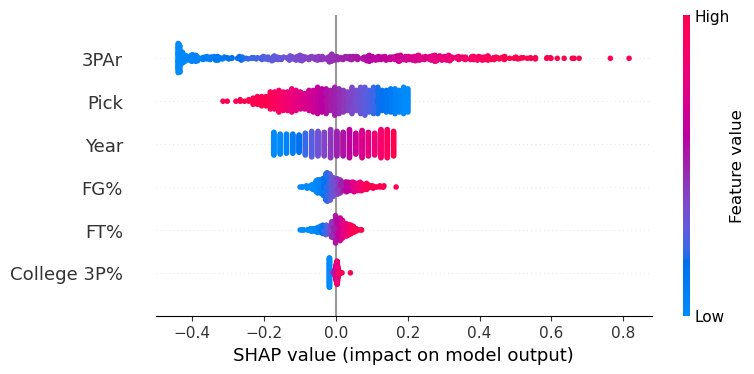

In [44]:
#Lineer Regresyon
k_means_lin_reg = shap.kmeans(xtrain_1, 5)

explainer = shap.KernelExplainer(lin_reg_1.predict, k_means_lin_reg)
shap_values = explainer.shap_values(xtrain_1)

shap.summary_plot(shap_values, xtrain_1)

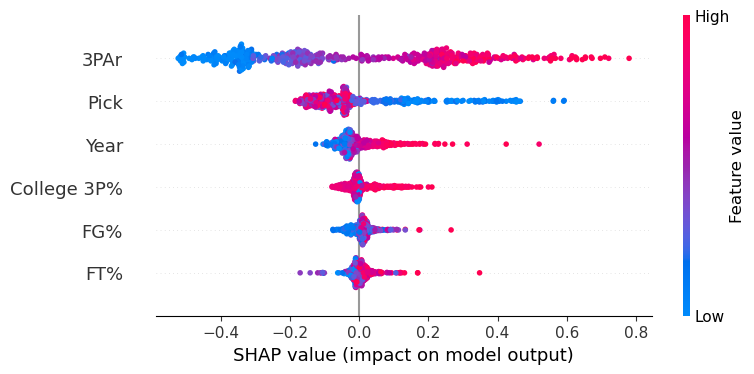

In [45]:
#Random Forest
explainer = shap.TreeExplainer(rf_1)
shap_values = explainer.shap_values(xtrain_1)

shap.summary_plot(shap_values, xtrain_1)

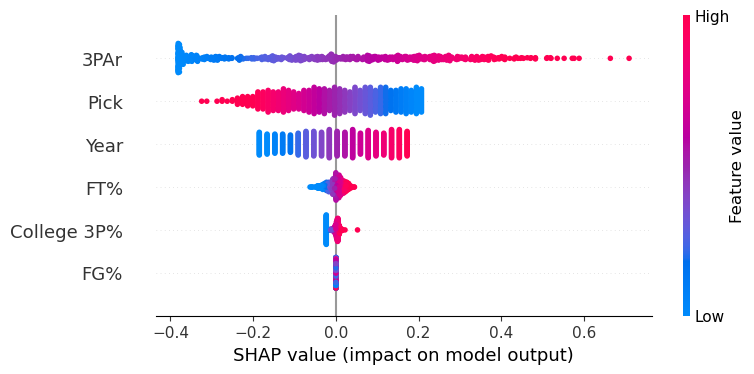

In [46]:
#Elastic Net
k_means_elastic_net = shap.kmeans(xtrain_1, 5)

explainer = shap.KernelExplainer(elastic_net_1.predict, k_means_elastic_net)
shap_values = explainer.shap_values(xtrain_1)

shap.summary_plot(shap_values, xtrain_1)

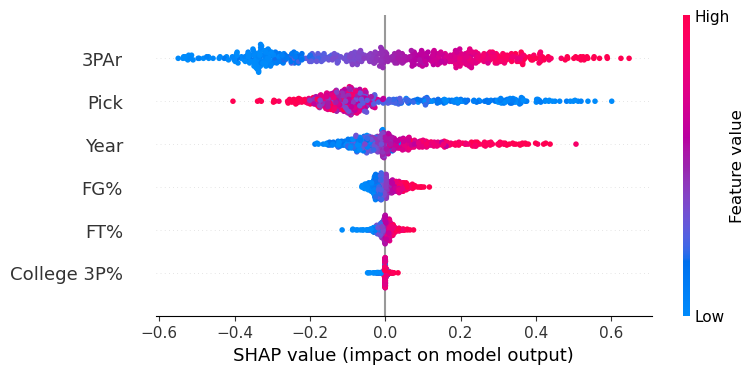

In [47]:
#Support Vector Regression
k_means_svr = shap.kmeans(xtrain_1, 5)

explainer = shap.KernelExplainer(svr_1.predict, k_means_svr)
shap_values = explainer.shap_values(xtrain_1)

shap.summary_plot(shap_values, xtrain_1)

Maç başı üçlük isabeti çıktısı için dört tahminleme modelinin de en önemli üç değişken olarak sırasıyla 3PAr(üçlük deneme sıklığı), Pick(seçim sırası) ve Year değişkenini kullandığı göze çarpıyor. 3PAr modelin çıktılarına oldukça geniş bir aralıkta etki ediyor. Deneme sıklığı ve çıktıya olan pozitif etki doğru orantılı.

Pick değişkenin Lineer Regresyon ve Elastic Net modellerinde diğer ikisine kıyasla daha dar bir aralık izlediği, yani modelin çıktısına daha az etki ettiği görülüyor. Seçim sırasında gerilere gidilmesinin modele etkisi negatif. Bu durum projenin başlarında ortaya atılan "Yüksek sıra seçimleri daha fazla süre bulduğu için daha çok üçlük isabeti buluyor" varsayımını doğruluyor. 

Yıl değişkeni Lineer Regresyon ve Elastic net modellerinde yine diğer ikisine kıyasla çıktıya daha az etki ediyor. Yıllar ve üçlük isabeti sayısı doğru orantılı olarak artıyor. Projenin başında bahsedilen "son yıllarda oyununun çok daha üçlük merkezli oynanması" durumunu burada da fark edebiliyoruz.

# 3PT%

In [48]:
#Tahminini yapacağımız 3P%(Üçlük Yüzdesi) değişkeninin diğer değişkenlerle olan korelasyonunun incelenmesi
corr_matrix = historical.corr()
corr_matrix["3P%"].sort_values(ascending = False)

3P%            1.000000
3PTM           0.582977
3PAr           0.571720
FT%            0.427372
College 3P%    0.407740
MP             0.219756
PTS            0.170744
Year           0.161207
OWS            0.057603
SOS            0.042288
G             -0.013866
TS%           -0.042229
Pick          -0.060806
eFG%          -0.147365
2P%           -0.267021
FTr           -0.330312
FG%           -0.436392
Name: 3P%, dtype: float64


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.


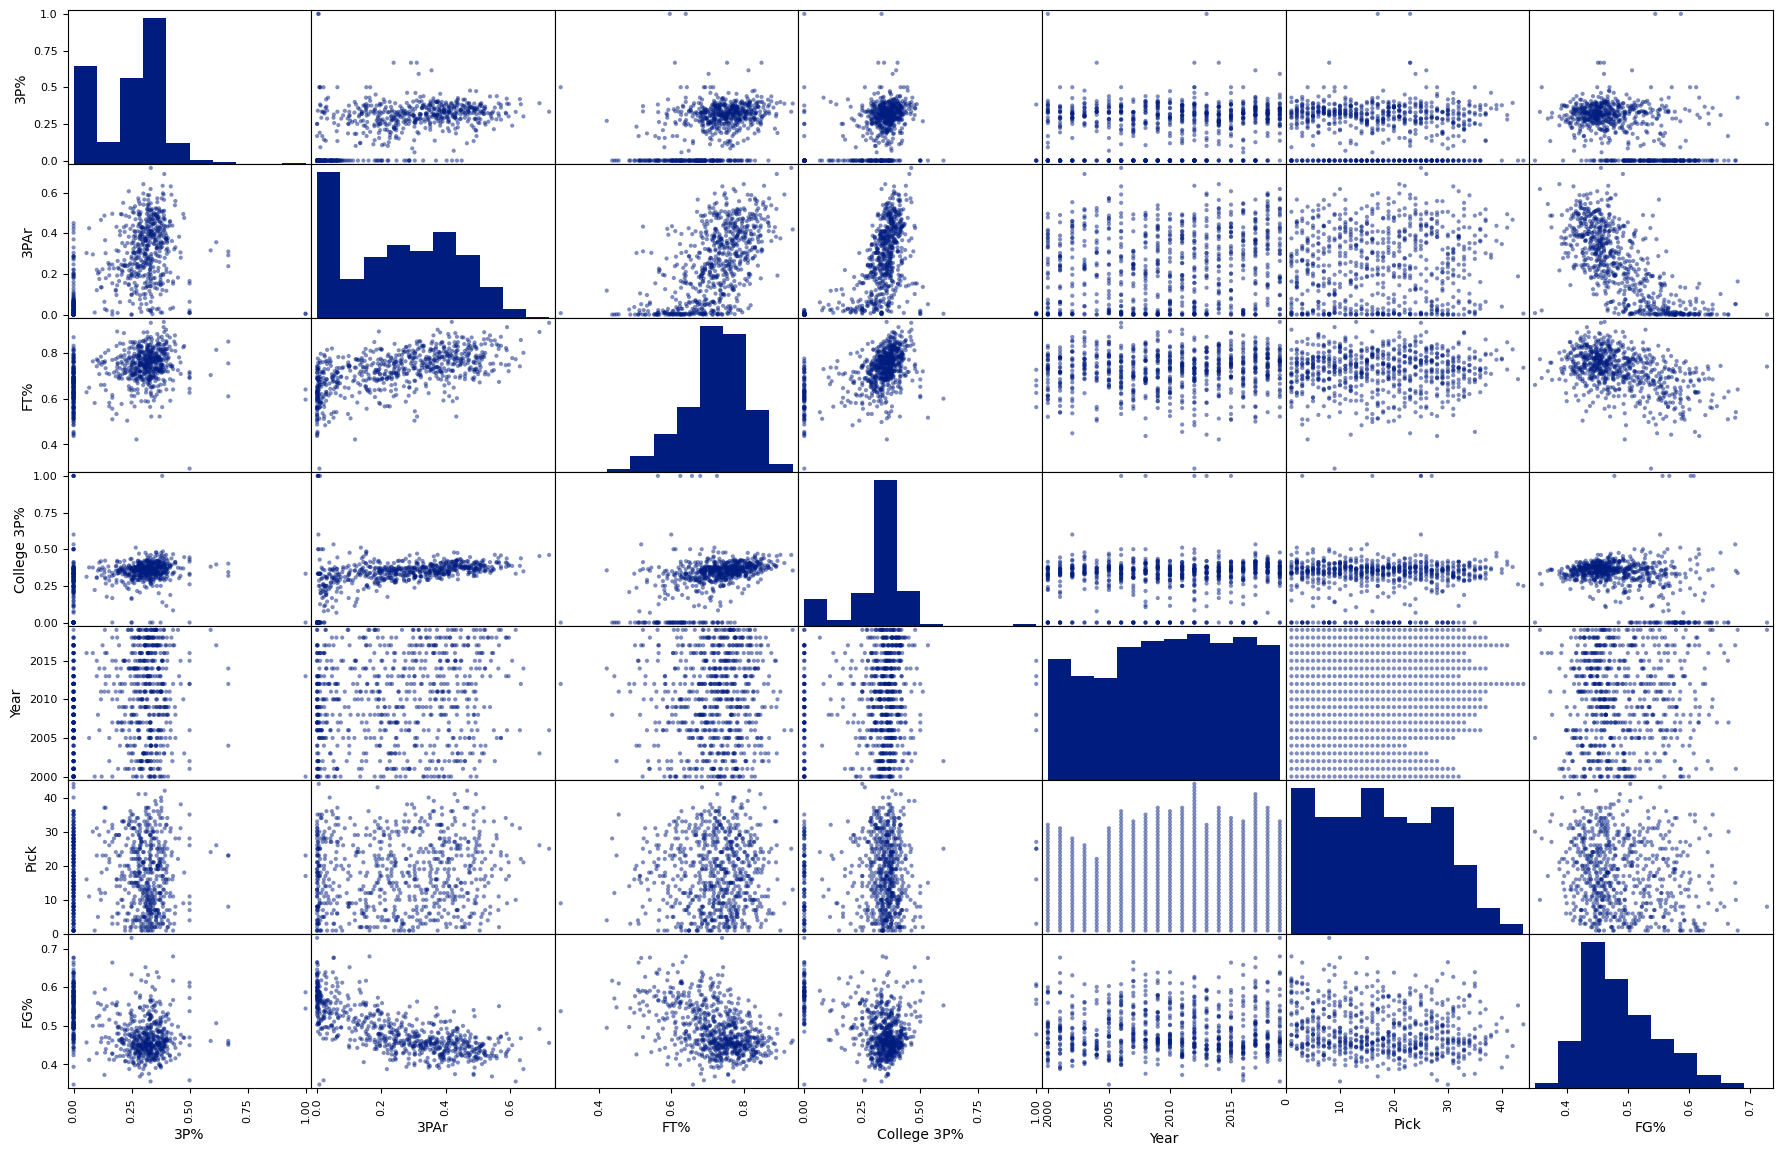

In [49]:
#Modelde kullanılacak değişkenlerin birbiriyle olan ilişkisi
attributes_2 = ["3P%", "3PAr", "FT%", "College 3P%", "Year", "Pick","FG%"]
scatter_matrix(historical[attributes_2], figsize = (22,14), alpha = 0.5)
plt.show()


3P% değişkeninin 3PTM'e kıyasla diğer değişkenlerle bariz bir ilişkisi tabloda göze çarpmıyor fakat College 3P% ve FT% değişkenleriyle pozitif, FG% değişkeniyle negatif korelasyonunun biraz da olsa belli olduğu söylenebilir.

In [50]:
#Değişkenler ve çıktı değişkeninin tanımlanması
features_2 = ['3PAr','FT%', 'College 3P%', 'Year', 'Pick', 'FG%']
output_2 = ['3P%']

In [51]:
#Train ve test setleri oluşturuldu. R2'yi kötü etkilemesi sebebiyle bu kez tabakalı örnekleme kullanılmadı.
xtrain_2 = train_1[features_2]
ytrain_2 = train_1[output_2]

xtest_2 = test_1[features_2]
ytest_2 = test_1[output_2]

ytrain_2

3P%
516  0.286
81   0.333
578  0.000
612  0.343
650  0.287
212  0.000
34   0.330
83   0.333
561  0.318
341  0.393
50   0.240
313  0.000
75   0.000
27   0.345
125  0.333
309  0.345
178  0.388
485  0.369
621  0.385
287  0.326
461  0.250
207  0.288
586  0.125
512  0.220
285  0.400
346  0.000
662  0.345
111  0.371
303  0.000
295  0.000
..     ...
106  0.000
328  0.000
468  0.262
365  0.313
554  0.266
495  0.245
584  0.371
488  0.185
191  0.328
531  0.000
261  0.000
608  0.324
276  0.375
118  0.405
373  0.308
614  0.367
248  0.259
601  0.356
541  0.351
530  0.404
206  0.000
672  0.287
651  0.332
453  0.290
547  0.286
324  0.000
85   0.000
490  0.263
122  0.333
417  0.383

[540 rows x 1 columns]

In [52]:
#scores fonksiyonunun üçlük yüzdesi için olan bir versiyonu yazıldı.
def scores_3percentage(model):
    
    model.fit(xtrain_2, ytrain_2.values.ravel())
    y_pred_2 = model.predict(xtest_2)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest_2, y_pred_2))
    print('R2 score: %.3f' % r2_score(ytest_2, y_pred_2))

    cv_score_2 = cross_val_score(model, xtest_2,ytest_2.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cv_score_2.mean(), cv_score_2.std() * 2))
    
    y_results_2 = []
    
    for i in y_pred_2:
        y_results_2.append(i)
        
    return(y_results_2)

In [53]:
#Grid Search ile Random Forest için optimum parametreleri bulma denemesi yapıldı, sonuç bir öncekine benzer oldu.
from sklearn.model_selection import GridSearchCV

param_grid_2 = { 
    'n_estimators': [3, 10, 15, 20, 25, 30, 35],
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : [5,7,9,11,13,15],
}
    
rf_2 = RandomForestRegressor()

grid_search_2 = GridSearchCV(estimator= rf_2, param_grid=param_grid_2, cv= 3)

grid_search_2.fit(xtrain_2, ytrain_2.values.ravel())
grid_search_2.best_params_
#Parametreler yine manuel seçildi

{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 25}

In [54]:
#MSE, R2 ve çapraz doğrulama skorları yine bu dört modele uygulandı.
lin_reg_2 = LinearRegression()
y_lin_reg_2 = scores_3percentage(lin_reg_2)

rf_2 = RandomForestRegressor(random_state = 0, max_features = 'log2', n_estimators = 24, max_depth = 4)
y_rf_2 = scores_3percentage(rf_2)

elastic_net_2 = ElasticNetCV()
y_elastic_net_2 = scores_3percentage(elastic_net_2)

svr_2 = SVR(kernel = 'rbf', gamma= 0.0001, epsilon = 0.09, C = 7000)
y_svr_2 = scores_3percentage(svr_2)

Mean squared error: 0.015
R2 score: 0.363
R2 cross validation score: 0.32 (+/- 0.18)
Mean squared error: 0.014
R2 score: 0.407
R2 cross validation score: 0.37 (+/- 0.12)
Mean squared error: 0.015
R2 score: 0.347
R2 cross validation score: 0.28 (+/- 0.10)
Mean squared error: 0.015
R2 score: 0.374
R2 cross validation score: 0.32 (+/- 0.03)


MSE değerleri iyi bir işaret olarak oldukça düşük. En iyi tahmin yapan modellerin Random Forest ve Support Vector Regression olduğu gözlemlendi.

In [55]:
#Üçlük yüzdesi için yeni bir artık fonksiyonu yazıldı.
def residuals_3percentage(x):
    
    resid_2 = [i for i in (ytest_2['3P%'] - x)]
    ssr_2 = [i ** 2 for i in resid_2]
    
    ssr_sum_2 = 0
    for i in ssr_2:
        ssr_sum_2 += i
        
    stand_resid_2 = []
    for i in resid_2:
        stand_resid_2.append(i / ((ssr_sum_2 / (ytest_2.shape[0] - 2)) ** (1/2)))
    
    resid_list_2 = []
    
    for i in stand_resid_2:
        resid_list_2.append(i)
        
    return resid_list_2

In [56]:
#Artık fonksiyonu dört modele de uygulandı.
lin_reg_2_resid = residuals_3percentage(y_lin_reg_2)
rf_2_resid = residuals_3percentage(y_rf_2)
elastic_net_2_resid = residuals_3percentage(y_elastic_net_2)
svr_2_resid = residuals_3percentage(y_svr_2)

(array([ 2.,  3., 28., 32., 33., 18., 11.,  3.,  4.,  1.]),
 array([-2.49892119, -1.88629164, -1.2736621 , -0.66103256, -0.04840302,
         0.56422652,  1.17685606,  1.7894856 ,  2.40211515,  3.01474469,
         3.62737423]),
 <BarContainer object of 10 artists>)

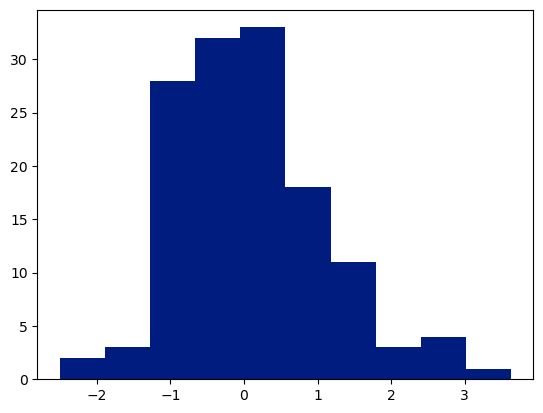

In [57]:
plt.hist(lin_reg_2_resid)

(array([ 3.,  4., 21., 33., 41., 18.,  8.,  2.,  2.,  3.]),
 array([-2.37965799, -1.78950892, -1.19935985, -0.60921079, -0.01906172,
         0.57108734,  1.16123641,  1.75138547,  2.34153454,  2.93168361,
         3.52183267]),
 <BarContainer object of 10 artists>)

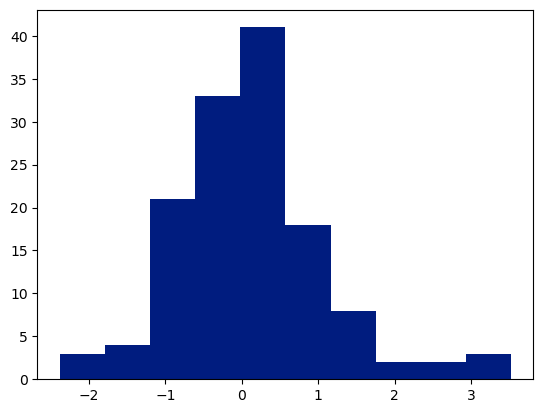

In [58]:
plt.hist(rf_2_resid)

(array([ 2.,  3., 25., 29., 38., 20., 10.,  3.,  2.,  3.]),
 array([-2.50892569, -1.90043741, -1.29194912, -0.68346083, -0.07497255,
         0.53351574,  1.14200403,  1.75049231,  2.3589806 ,  2.96746889,
         3.57595717]),
 <BarContainer object of 10 artists>)

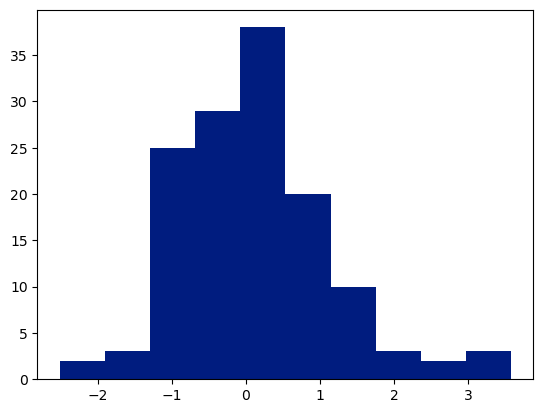

In [59]:
plt.hist(elastic_net_2_resid)

(array([ 2.,  3., 27., 40., 29., 17., 10.,  3.,  3.,  1.]),
 array([-2.38495425, -1.76651191, -1.14806957, -0.52962723,  0.08881511,
         0.70725745,  1.32569979,  1.94414213,  2.56258447,  3.18102681,
         3.79946915]),
 <BarContainer object of 10 artists>)

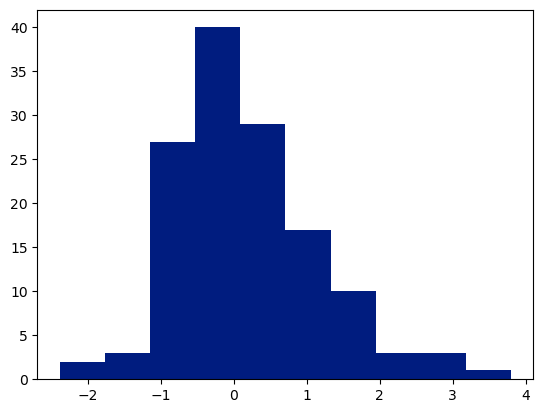

In [60]:
plt.hist(svr_2_resid)

İlk üç modelin artıklarında hafif bir sağa çarpıklık, Support Vector Regression modelinde ise hafif bir sola çarpıklık göze çarpıyor. Artıkların çoğu yine -2 ve 3 arasında toplanıyor. 

In [61]:
#Üçlük yüzdesi için aykırı değer fonksiyonu yazıldı.
def outliers_3percentage(x):
    
    np_list_2 = np.array(x)
    stdev_2 = np.std(np_list_2)
    mean_2 = np.mean(np_list_2)

    outliers_2 = 0
    for i in x:
        if i < mean_2 - 2 * stdev_2:
            outliers_2 += 1
        elif i > mean_2 + 2 * stdev_2:
            outliers_2 += 1

    outlier_percent_2 = 1 - outliers_2 / ytest_2.shape[0]
    outlier_string_2 = "{:.3%}".format(outlier_percent_2)
    
    return outlier_string_2

Text(0, 0, '***********************************************************')

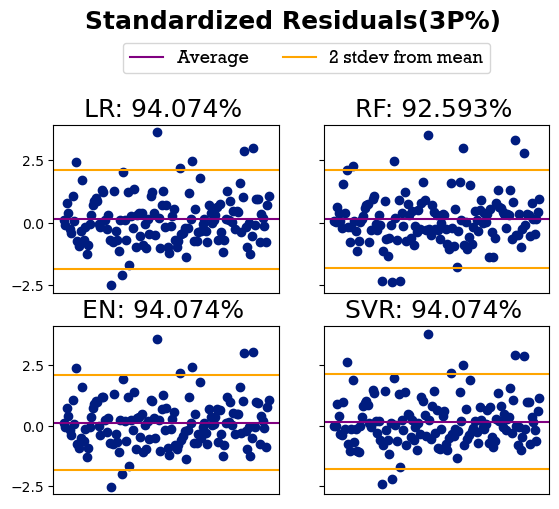

In [62]:
#Üçlük yüzdesi için standardize edilmiş artık tablosu oluşturuldu.
plt.style.use('seaborn-dark-palette')

resid_fig_2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = 'row')

x = np.arange(ytest_2.shape[0])
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax4.xaxis.set_visible(False)

ax1.scatter(x, lin_reg_2_resid)
ax1.axhline(y = np.mean(lin_reg_2_resid), label = "Average", color = 'purple')
ax1.axhline(y = np.mean(lin_reg_2_resid) - 2 * np.std(lin_reg_2_resid), color = 'orange')
ax1.axhline(y = np.mean(lin_reg_2_resid) + 2 * np.std(lin_reg_2_resid), label = "2 stdev from mean", color = 'orange')
ax1.set_title("LR: %s" % outliers(lin_reg_2_resid), size = 18, x = .485, ha = 'center')

ax2.scatter(x, rf_2_resid)
ax2.axhline(y = np.mean(rf_2_resid), color = 'purple')
ax2.axhline(y = np.mean(rf_2_resid) - 2 * np.std(rf_2_resid), color = 'orange')
ax2.axhline(y = np.mean(rf_2_resid) + 2 * np.std(rf_2_resid), color = 'orange')
ax2.set_title("RF: %s" % outliers(rf_2_resid), size = 18, x = .485, ha = 'center')

ax3.scatter(x, elastic_net_2_resid)
ax3.axhline(y = np.mean(elastic_net_2_resid), color = 'purple')
ax3.axhline(y = np.mean(elastic_net_2_resid) - 2 * np.std(elastic_net_2_resid), color = 'orange')
ax3.axhline(y = np.mean(elastic_net_2_resid) + 2 * np.std(elastic_net_2_resid), color = 'orange')
ax3.set_title("EN: %s" % outliers(elastic_net_2_resid), size = 18, x = .485, ha = 'center')

ax4.scatter(x, svr_2_resid)
ax4.axhline(y = np.mean(svr_2_resid), color = 'purple')
ax4.axhline(y = np.mean(svr_2_resid) - 2 * np.std(svr_2_resid), color = 'orange')
ax4.axhline(y = np.mean(svr_2_resid) + 2 * np.std(svr_2_resid), color = 'orange')
ax4.set_title("SVR: %s" % outliers(svr_2_resid), size = 18, x = .485, ha = 'center')

resid_fig_2.legend(loc = (.22, .855), ncol=2, prop={'size': 12, "family": "Rockwell"})

resid_fig_2.suptitle("Standardized Residuals(3P%)", weight = 'bold', size = 18, y = 1.12)

ax1.yaxis.set_ticks([-2.5, 0, 2.5])
ax3.yaxis.set_ticks([-2.5, 0, 2.5])

resid_fig.text(x = 0, y = 0,
    s = '***********************************************************',
    fontsize = 14, color = 'grey', horizontalalignment='left')

Tablodaki aykırı değer sayısının bu kez Lineer Regresyon, Elastic Net ve Support Vector Regression için 3PTM çıktısına kıyasla daha az olduğu görülüyor. Random Forest ise bu üçü kadar iyi bir performans sergileyemedi.

Text(0, -0.05, '************************************************************')

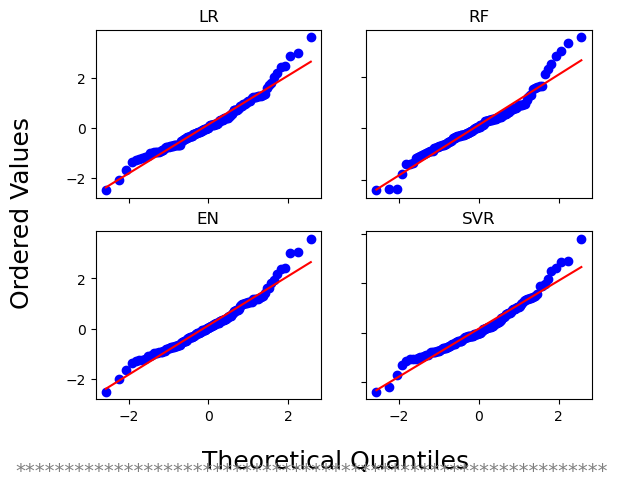

In [63]:
#QQ Plot tablosu oluşturuldu.
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-dark-palette')

qqplot_2 = plt.figure()

ax1_2 = qqplot_2.add_subplot(221)
stats.probplot(lin_reg_2_resid, dist="norm", plot=plt)
ax1_2.set_xlabel("")
ax1_2.set_xticklabels([])
ax1_2.set_ylabel("")
ax1_2.set_title("LR")

ax2_2 = qqplot_2.add_subplot(222)
stats.probplot(rf_2_resid, dist="norm", plot=plt)
ax2_2.set_xlabel("")
ax2_2.set_xticklabels([])
ax2_2.set_ylabel("")
ax2_2.set_title("RF")
ax2_2.set_xticklabels([])
ax2_2.set_yticklabels([])

ax3_2 = qqplot_2.add_subplot(223)
stats.probplot(elastic_net_2_resid, dist="norm", plot=plt)
ax3_2.set_xlabel("")
ax3_2.set_ylabel("")
ax3_2.set_title("EN")

ax4_2 = qqplot_2.add_subplot(224)
stats.probplot(svr_2_resid, dist = "norm", plot = plt)
ax4_2.set_xlabel("")
ax4_2.set_ylabel("")
ax4_2.set_title("SVR")
ax4_2.set_yticklabels([])

qqplot_2.text(0.5, -0.02, 'Theoretical Quantiles', ha='center', va='center', size = 18)
qqplot_2.text(0.01, 0.5, 'Ordered Values', ha='center', va='center', rotation='vertical', size = 18)

qqplot_2.text(x = 0, y = -0.05,
    s = '************************************************************',
    fontsize = 14, color = 'grey', horizontalalignment='left')

3P% artıklarının dağılımının 3PTM artıklarına kıyasla daha da normal bir tablo oluşturduğu göze çarpıyor. Normallikten sapılan yegane nokta dört model için de 2 büyüklüğüne tekabül eden teorik çeyreklikten sonraki kısım. Aykırı değerlerin isabetli tahmini projenin önceliği olmadığı için yine hataların normal dağıldığı varsayılıp devam edildi. 

# Üçlük Yüzdesi Tahminleme

In [64]:
curr_pred_2 = current[features_2]

#Üçlük yüzdesi için predict fonksiyonu yazıldı.
def predict_3percentage(model):
    
    y_pred_2 = model.predict(curr_pred_2)
    
    for i, j in zip(current['Player'], y_pred_2):
        print(i, j)
        
    return y_pred_2

#Lineer regresyon tahmini
lin_reg_2_pred= predict(lin_reg_2)

Anthony Edwards 0.3913336969891148
James Wiseman 0.1132959857037017
Patrick Williams 0.29919495987142763
Isaac Okoro 0.2801841172860149
Onyeka Okongwu 0.1598671114738961
Obi Toppin 0.2303388484850437
Jalen Smith 0.2743351486413692
Devin Vassell 0.35087630133508885
Tyrese Haliburton 0.41907763785480334
Kira Lewis 0.33935859803854385
Aaron Nesmith 0.43153425788757094
Cole Anthony 0.35002070292194354
Isaiah Stewart 0.17581972644564292
Josh Green 0.2998533165220296
Saddiq Bey 0.3782332637173411
Precious Achiuwa 0.18747758081406918
Tyrese Maxey 0.30341553141188715
Zeke Nnaji 0.1696458998092849
Immanuel Quickley 0.3902672963818361
Payton Pritchard 0.37643546896816904
Udoka Azubuike 0.027709810564221726
Jaden McDaniels 0.3166282517238175
Malachi Flynn 0.3897662407804008
Desmond Bane 0.34218711112776035
Tyrell Terry 0.36454535070726735
Vernon Carey Jr. 0.15812289422529613
Daniel Oturu 0.16337475689828018
Xavier Tillman Sr. 0.16653381878644602
Elijah Hughes 0.3710108123283016
Robert Woodard II 

In [65]:
#Random Forest tahmini
rf_2_pred = predict(rf_2)

Anthony Edwards 0.3244836714550124
James Wiseman 0.10544567390001475
Patrick Williams 0.28613214934725956
Isaac Okoro 0.2463460153260836
Onyeka Okongwu 0.12680254409720057
Obi Toppin 0.2960613779757714
Jalen Smith 0.27354876516910487
Devin Vassell 0.32578685571257715
Tyrese Haliburton 0.33684925588724157
Kira Lewis 0.3210584353525407
Aaron Nesmith 0.321796586577064
Cole Anthony 0.31115609146487416
Isaiah Stewart 0.13560748699737377
Josh Green 0.28371959921246953
Saddiq Bey 0.32142308812242565
Precious Achiuwa 0.2235408616375384
Tyrese Maxey 0.3109136801395171
Zeke Nnaji 0.14454101357586444
Immanuel Quickley 0.31863128509622296
Payton Pritchard 0.3130648530990707
Udoka Azubuike 0.053133834093473935
Jaden McDaniels 0.30908234141259155
Malachi Flynn 0.31133415486711064
Desmond Bane 0.33120077990168245
Tyrell Terry 0.3202347041659968
Vernon Carey Jr. 0.11441716050557675
Daniel Oturu 0.11781933363776066
Xavier Tillman Sr. 0.2113742681504195
Elijah Hughes 0.3095885737998701
Robert Woodard II

In [66]:
#Elastic Net tahmini
elastic_net_2_pred = predict(elastic_net_2)

Anthony Edwards 0.38168287119979327
James Wiseman 0.14558439273193935
Patrick Williams 0.28557464242854147
Isaac Okoro 0.28501185911182647
Onyeka Okongwu 0.16738972986406653
Obi Toppin 0.24488124590540972
Jalen Smith 0.2762803426074574
Devin Vassell 0.35030545245108824
Tyrese Haliburton 0.4252474847704506
Kira Lewis 0.33090672196465265
Aaron Nesmith 0.42675049425437583
Cole Anthony 0.33660830748715087
Isaiah Stewart 0.17643468280416785
Josh Green 0.2867700579773804
Saddiq Bey 0.3801706352042937
Precious Achiuwa 0.18852491151166229
Tyrese Maxey 0.29002505344612795
Zeke Nnaji 0.17076545794550357
Immanuel Quickley 0.3741831926028705
Payton Pritchard 0.37109373257478717
Udoka Azubuike 0.07352297469777413
Jaden McDaniels 0.3058402203353068
Malachi Flynn 0.3820316563816779
Desmond Bane 0.34162098569676447
Tyrell Terry 0.35320910001655337
Vernon Carey Jr. 0.1649842673154409
Daniel Oturu 0.16841841346979303
Xavier Tillman Sr. 0.17639452454030868
Elijah Hughes 0.3671203133982339
Robert Woodard 

In [67]:
#Support Vector Regression tahmini
svr_2_pred = predict(svr_2)

Anthony Edwards 0.4006449097474105
James Wiseman 0.15110457114910236
Patrick Williams 0.3244337530937118
Isaac Okoro 0.29067180781616475
Onyeka Okongwu 0.18672054480479705
Obi Toppin 0.23579149755236717
Jalen Smith 0.28281574359929795
Devin Vassell 0.3467134355574162
Tyrese Haliburton 0.40675433243135917
Kira Lewis 0.34303894862618467
Aaron Nesmith 0.4233811120016471
Cole Anthony 0.35119725953749725
Isaiah Stewart 0.19030902289027285
Josh Green 0.30248067737788364
Saddiq Bey 0.3639569241736753
Precious Achiuwa 0.1860693247495364
Tyrese Maxey 0.3095599600751884
Zeke Nnaji 0.17388168905430934
Immanuel Quickley 0.3859593705961233
Payton Pritchard 0.368181649984348
Udoka Azubuike 0.03704201926170203
Jaden McDaniels 0.3150409393024747
Malachi Flynn 0.38465611359656027
Desmond Bane 0.3295884171071011
Tyrell Terry 0.35852428730190145
Vernon Carey Jr. 0.15017342787772936
Daniel Oturu 0.1576171928777912
Xavier Tillman Sr. 0.16940350350300282
Elijah Hughes 0.37247254175467237
Robert Woodard II 0

In [68]:
#Dört modelin de sonuçlarını içeren Dataframe oluşturuldu
draft_2020_3perc = pd.DataFrame(
    {'Player Name': player_names,
     'LR 3P%': lin_reg_2_pred,
     'RF 3P%': rf_2_pred,
     'EN 3P%': elastic_net_2_pred,
     'SVR 3P%': svr_2_pred
    })

draft_2020_3perc

Player Name    LR 3P%    RF 3P%    EN 3P%   SVR 3P%
0      Anthony Edwards  0.391334  0.324484  0.381683  0.400645
1        James Wiseman  0.113296  0.105446  0.145584  0.151105
2     Patrick Williams  0.299195  0.286132  0.285575  0.324434
3          Isaac Okoro  0.280184  0.246346  0.285012  0.290672
4       Onyeka Okongwu  0.159867  0.126803  0.167390  0.186721
5           Obi Toppin  0.230339  0.296061  0.244881  0.235791
6          Jalen Smith  0.274335  0.273549  0.276280  0.282816
7        Devin Vassell  0.350876  0.325787  0.350305  0.346713
8    Tyrese Haliburton  0.419078  0.336849  0.425247  0.406754
9           Kira Lewis  0.339359  0.321058  0.330907  0.343039
10       Aaron Nesmith  0.431534  0.321797  0.426750  0.423381
11        Cole Anthony  0.350021  0.311156  0.336608  0.351197
12      Isaiah Stewart  0.175820  0.135607  0.176435  0.190309
13          Josh Green  0.299853  0.283720  0.286770  0.302481
14          Saddiq Bey  0.378233  0.321423  0.380171  0.363957
15    Precious Achiuwa  0.187478  0.223541  0.188525  0.186069
16        Tyrese Maxey  0.303416  0.310914  0.290025  0.309560
17          Zeke Nnaji  0.169646  0.144541  0.170765  0.173882
18   Immanuel Quickley  0.390267  0.318631  0.374183  0.385959
19    Payton Pritchard  0.376435  0.313065  0.371094  0.368182
20      Udoka Azubuike  0.027710  0.053134  0.073523  0.037042
21     Jaden McDaniels  0.316628  0.309082  0.305840  0.315041
22       Malachi Flynn  0.389766  0.311334  0.382032  0.384656
23        Desmond Bane  0.342187  0.331201  0.341621  0.329588
24        Tyrell Terry  0.364545  0.320235  0.353209  0.358524
25    Vernon Carey Jr.  0.158123  0.114417  0.164984  0.150173
26        Daniel Oturu  0.163375  0.117819  0.168418  0.157617
27  Xavier Tillman Sr.  0.166534  0.211374  0.176395  0.169404
28       Elijah Hughes  0.371011  0.309589  0.367120  0.372473
29   Robert Woodard II  0.232501  0.246366  0.237155  0.230444
30           Tre Jones  0.264881  0.300917  0.254453  0.273356
31       Nick Richards  0.065132  0.031992  0.078947  0.098405
32     Jahmi'us Ramsey  0.305214  0.291577  0.307302  0.302720
33        Jordan Nwora  0.331687  0.323841  0.327838  0.333787
34         C.J. Elleby  0.299468  0.309609  0.291776  0.306974
35          Isaiah Joe  0.456264  0.312600  0.452831  0.463787
36         Sam Merrill  0.357062  0.325361  0.351836  0.357652

In [69]:
#Dört modelin ortalama çıktı değeri Dataframe'e eklendi.
mean_3perc = ((draft_2020_3perc["LR 3P%"] + 
            draft_2020_3perc["RF 3P%"] + 
            draft_2020_3perc["EN 3P%"] +
            draft_2020_3perc["SVR 3P%"])/4)
draft_2020_3perc["Mean 3P%"] = mean_3perc

draft_2020_3perc

Player Name    LR 3P%    RF 3P%    EN 3P%   SVR 3P%  Mean 3P%
0      Anthony Edwards  0.391334  0.324484  0.381683  0.400645  0.374536
1        James Wiseman  0.113296  0.105446  0.145584  0.151105  0.128858
2     Patrick Williams  0.299195  0.286132  0.285575  0.324434  0.298834
3          Isaac Okoro  0.280184  0.246346  0.285012  0.290672  0.275553
4       Onyeka Okongwu  0.159867  0.126803  0.167390  0.186721  0.160195
5           Obi Toppin  0.230339  0.296061  0.244881  0.235791  0.251768
6          Jalen Smith  0.274335  0.273549  0.276280  0.282816  0.276745
7        Devin Vassell  0.350876  0.325787  0.350305  0.346713  0.343421
8    Tyrese Haliburton  0.419078  0.336849  0.425247  0.406754  0.396982
9           Kira Lewis  0.339359  0.321058  0.330907  0.343039  0.333591
10       Aaron Nesmith  0.431534  0.321797  0.426750  0.423381  0.400866
11        Cole Anthony  0.350021  0.311156  0.336608  0.351197  0.337246
12      Isaiah Stewart  0.175820  0.135607  0.176435  0.190309  0.169543
13          Josh Green  0.299853  0.283720  0.286770  0.302481  0.293206
14          Saddiq Bey  0.378233  0.321423  0.380171  0.363957  0.360946
15    Precious Achiuwa  0.187478  0.223541  0.188525  0.186069  0.196403
16        Tyrese Maxey  0.303416  0.310914  0.290025  0.309560  0.303479
17          Zeke Nnaji  0.169646  0.144541  0.170765  0.173882  0.164709
18   Immanuel Quickley  0.390267  0.318631  0.374183  0.385959  0.367260
19    Payton Pritchard  0.376435  0.313065  0.371094  0.368182  0.357194
20      Udoka Azubuike  0.027710  0.053134  0.073523  0.037042  0.047852
21     Jaden McDaniels  0.316628  0.309082  0.305840  0.315041  0.311648
22       Malachi Flynn  0.389766  0.311334  0.382032  0.384656  0.366947
23        Desmond Bane  0.342187  0.331201  0.341621  0.329588  0.336149
24        Tyrell Terry  0.364545  0.320235  0.353209  0.358524  0.349128
25    Vernon Carey Jr.  0.158123  0.114417  0.164984  0.150173  0.146924
26        Daniel Oturu  0.163375  0.117819  0.168418  0.157617  0.151807
27  Xavier Tillman Sr.  0.166534  0.211374  0.176395  0.169404  0.180927
28       Elijah Hughes  0.371011  0.309589  0.367120  0.372473  0.355048
29   Robert Woodard II  0.232501  0.246366  0.237155  0.230444  0.236617
30           Tre Jones  0.264881  0.300917  0.254453  0.273356  0.273402
31       Nick Richards  0.065132  0.031992  0.078947  0.098405  0.068619
32     Jahmi'us Ramsey  0.305214  0.291577  0.307302  0.302720  0.301703
33        Jordan Nwora  0.331687  0.323841  0.327838  0.333787  0.329288
34         C.J. Elleby  0.299468  0.309609  0.291776  0.306974  0.301957
35          Isaiah Joe  0.456264  0.312600  0.452831  0.463787  0.421371
36         Sam Merrill  0.357062  0.325361  0.351836  0.357652  0.347978

Lineer Regresyon, Elastic Net ve Support Vector Regression'ın genel olarak yakın sonuçlar çıkarttığı, Random Forest'ın ise diğer modellerde yüksek olan yüzdeleri daha düşük, düşük olanları daha yüksek gösterme eğiliminde olduğu gözlemlendi.

# SHAP Tabloları ve Model Karşılaştırma

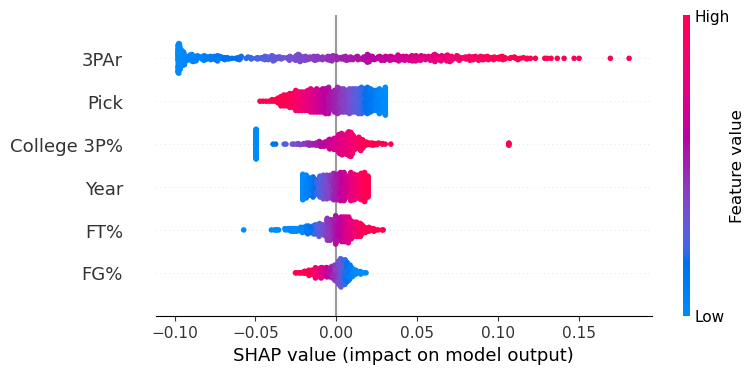

In [70]:
#Lineer Regresyon(3P%)
k_means_lin_reg_2 = shap.kmeans(xtrain_2, 5)

explainer = shap.KernelExplainer(lin_reg_2.predict, k_means_lin_reg_2)
shap_values = explainer.shap_values(xtrain_2)

shap.summary_plot(shap_values, xtrain_2)

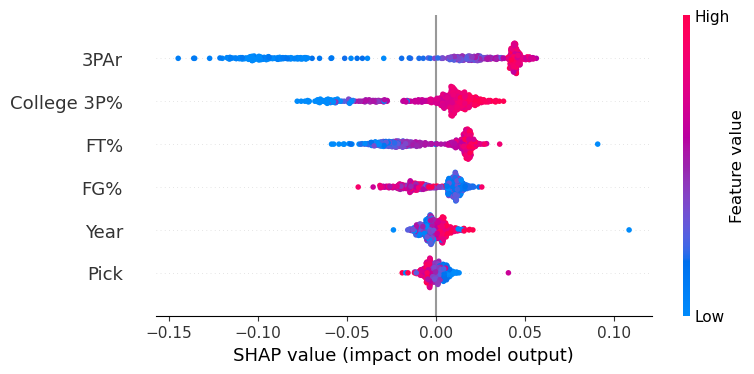

In [71]:
#Random Forest(3P%)
explainer = shap.TreeExplainer(rf_2)
shap_values = explainer.shap_values(xtrain_2)

shap.summary_plot(shap_values, xtrain_2)

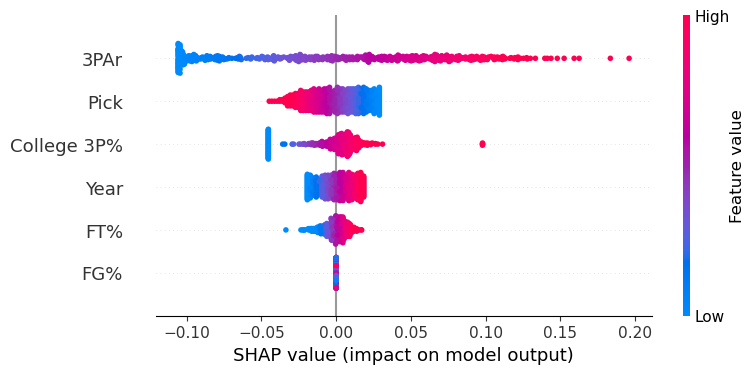

In [72]:
#Elastic Net(3P%)
k_means_elastic_net_2 = shap.kmeans(xtrain_2, 5)

explainer = shap.KernelExplainer(elastic_net_2.predict, k_means_elastic_net_2)
shap_values = explainer.shap_values(xtrain_2)

shap.summary_plot(shap_values, xtrain_2)

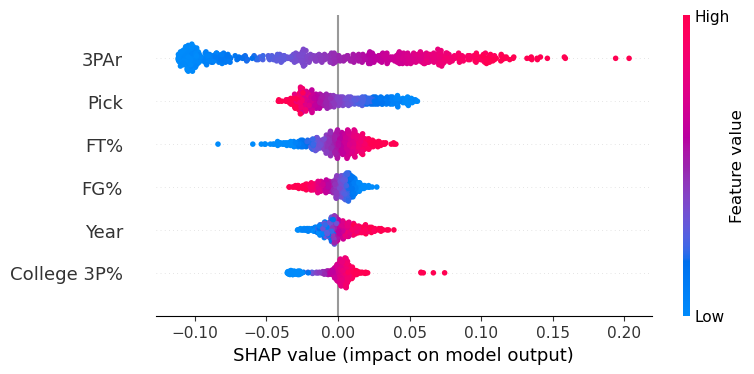

In [73]:
#Support Vector Regression(3P%)
k_means_svr_2 = shap.kmeans(xtrain_2, 5)

explainer = shap.KernelExplainer(svr_2.predict, k_means_svr_2)
shap_values = explainer.shap_values(xtrain_2)

shap.summary_plot(shap_values, xtrain_2)

Yüzde açısından en önemli indikatör yine 3PAr, çıktı değişkeninin sonucunu Random Forest haricinde oldukça geniş bir aralıkta etkiliyor. 

İkinci ve üçüncü sıralarda ise durum maç başı üçlük isabetinin sonuçlarına kıyasla farklılaşıyor. Üçlük yüzdesi tahminlemede modellerin üçü ikinci en önemli indikatöre pick'i koyarken(üçlük isabetinin aksine yüzdelerde seçim sırası yüksekliği ve yüzde arasında ters orantı var) Random Forest ise College 3P% koymuş.

Yılın üçlük yüzdesi açısından çok da önemli bir faktör olmadığını görüyoruz. Üçüncü en önemli indikatör Lineer Regresyon ve Elastic Net'te College 3P% iken diğer iki modelde ise FT%(Serbest atış yüzdesi). Bu durum aslında bir nevi basketbol otoritelerinin neden kolej serbest atış yüzdesine çok önem verdiğini ortaya koyuyor.

# Sonuçları Kombinleme

In [74]:
#İki çıktı değişkeninin de tahmin edilen ortalama değerleriyle yeni bir Dataframe oluşturuldu.
draft_2020_combined = pd.DataFrame(
    {'Player Name': player_names,
     '3PM Per Game': draft_2020_3pm["Mean 3PM"],
     '3 Point%': draft_2020_3perc["Mean 3P%"]
    })

draft_2020_combined

Player Name  3PM Per Game  3 Point%
0      Anthony Edwards      1.359038  0.374536
1        James Wiseman      0.297059  0.128858
2     Patrick Williams      0.789244  0.298834
3          Isaac Okoro      0.957297  0.275553
4       Onyeka Okongwu      0.354760  0.160195
5           Obi Toppin      0.730979  0.251768
6          Jalen Smith      0.833778  0.276745
7        Devin Vassell      1.136991  0.343421
8    Tyrese Haliburton      1.480786  0.396982
9           Kira Lewis      0.872788  0.333591
10       Aaron Nesmith      1.323251  0.400866
11        Cole Anthony      0.850870  0.337246
12      Isaiah Stewart      0.347156  0.169543
13          Josh Green      0.684783  0.293206
14          Saddiq Bey      1.115964  0.360946
15    Precious Achiuwa      0.435704  0.196403
16        Tyrese Maxey      0.679011  0.303479
17          Zeke Nnaji      0.308519  0.164709
18   Immanuel Quickley      0.936313  0.367260
19    Payton Pritchard      0.926427  0.357194
20      Udoka Azubuike      0.160338  0.047852
21     Jaden McDaniels      0.700937  0.311648
22       Malachi Flynn      0.914607  0.366947
23        Desmond Bane      0.861654  0.336149
24        Tyrell Terry      0.844432  0.349128
25    Vernon Carey Jr.      0.201586  0.146924
26        Daniel Oturu      0.195974  0.151807
27  Xavier Tillman Sr.      0.334442  0.180927
28       Elijah Hughes      0.864292  0.355048
29   Robert Woodard II      0.466031  0.236617
30           Tre Jones      0.457567  0.273402
31       Nick Richards      0.132203  0.068619
32     Jahmi'us Ramsey      0.626691  0.301703
33        Jordan Nwora      0.738556  0.329288
34         C.J. Elleby      0.561415  0.301957
35          Isaiah Joe      1.093485  0.421371
36         Sam Merrill      0.874073  0.347978

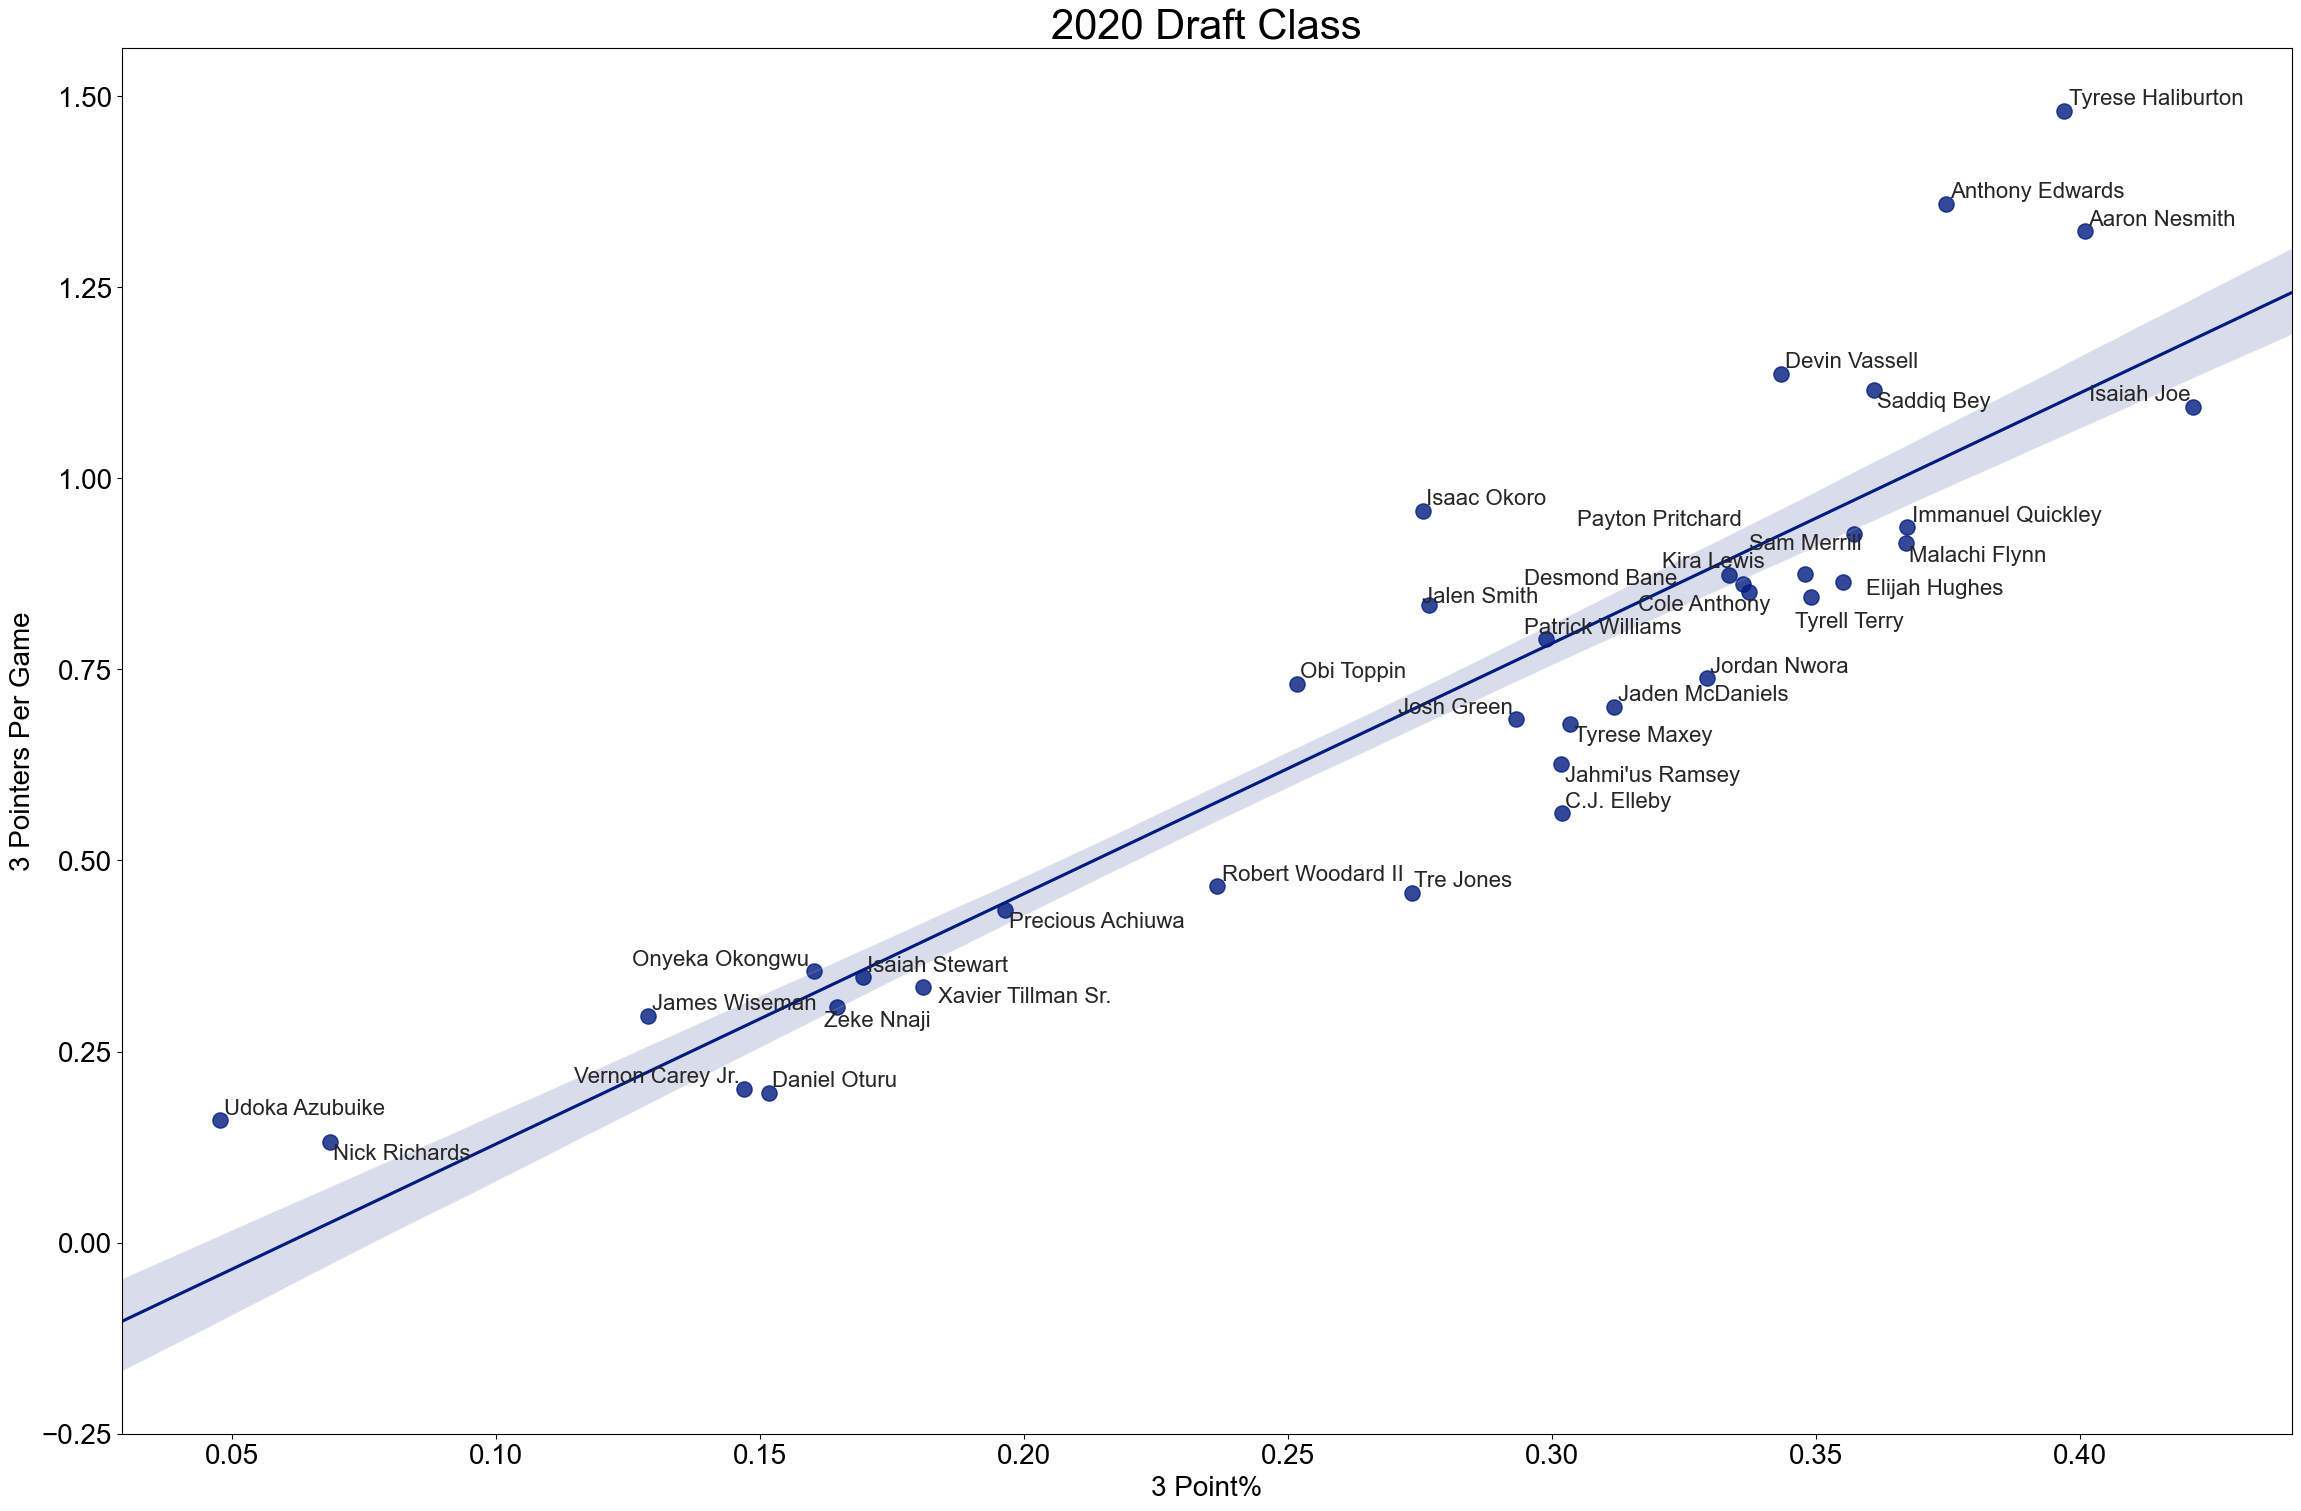

In [75]:
#Oyuncuların üçlük performansları Scatter Plot halinde görselleştirildi
import seaborn as sns
three_made = draft_2020_combined["3PM Per Game"]
three_percentage =  draft_2020_combined["3 Point%"]


f, ax = plt.subplots(figsize=(28,18))
plt.style.use('seaborn-dark-palette')
sns.set()
sns.set_style("whitegrid")
sns.set_style("ticks",
             {"xtick.major.size":100,
             "ytick.major.size":100})
graph = sns.regplot(x = three_percentage,
           y = three_made,
            data = draft_2020_combined,
           ci = 68,
           truncate = False,
                    scatter_kws={'s':120});

plt.title("2020 Draft Class", fontsize = 30)
plt.xlabel('3 Point%', fontsize = 20)
plt.ylabel('3 Pointers Per Game', fontsize = 20)
plt.rcParams.update({'font.size': 15})
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=6)
texts = []
for x, y, l in zip(three_percentage, three_made, player_names):
    texts.append(plt.text(x, y, l, size=16))
adjust_text(texts)
plt.show()



In [76]:
#Maç başı üçlük isabetine göre sıralanmış Dataframe
draft_2020_sorted3pm = draft_2020_combined.sort_values(by=['3PM Per Game'],ascending = False)

draft_2020_sorted3pm

Player Name  3PM Per Game  3 Point%
8    Tyrese Haliburton      1.480786  0.396982
0      Anthony Edwards      1.359038  0.374536
10       Aaron Nesmith      1.323251  0.400866
7        Devin Vassell      1.136991  0.343421
14          Saddiq Bey      1.115964  0.360946
35          Isaiah Joe      1.093485  0.421371
3          Isaac Okoro      0.957297  0.275553
18   Immanuel Quickley      0.936313  0.367260
19    Payton Pritchard      0.926427  0.357194
22       Malachi Flynn      0.914607  0.366947
36         Sam Merrill      0.874073  0.347978
9           Kira Lewis      0.872788  0.333591
28       Elijah Hughes      0.864292  0.355048
23        Desmond Bane      0.861654  0.336149
11        Cole Anthony      0.850870  0.337246
24        Tyrell Terry      0.844432  0.349128
6          Jalen Smith      0.833778  0.276745
2     Patrick Williams      0.789244  0.298834
33        Jordan Nwora      0.738556  0.329288
5           Obi Toppin      0.730979  0.251768
21     Jaden McDaniels      0.700937  0.311648
13          Josh Green      0.684783  0.293206
16        Tyrese Maxey      0.679011  0.303479
32     Jahmi'us Ramsey      0.626691  0.301703
34         C.J. Elleby      0.561415  0.301957
29   Robert Woodard II      0.466031  0.236617
30           Tre Jones      0.457567  0.273402
15    Precious Achiuwa      0.435704  0.196403
4       Onyeka Okongwu      0.354760  0.160195
12      Isaiah Stewart      0.347156  0.169543
27  Xavier Tillman Sr.      0.334442  0.180927
17          Zeke Nnaji      0.308519  0.164709
1        James Wiseman      0.297059  0.128858
25    Vernon Carey Jr.      0.201586  0.146924
26        Daniel Oturu      0.195974  0.151807
20      Udoka Azubuike      0.160338  0.047852
31       Nick Richards      0.132203  0.068619

In [77]:
#Üçlük yüzdesine göre sıralanmış Dataframe
draft_2020_sorted3perc = draft_2020_combined.sort_values(by=['3 Point%'],ascending = False)

draft_2020_sorted3perc

Player Name  3PM Per Game  3 Point%
35          Isaiah Joe      1.093485  0.421371
10       Aaron Nesmith      1.323251  0.400866
8    Tyrese Haliburton      1.480786  0.396982
0      Anthony Edwards      1.359038  0.374536
18   Immanuel Quickley      0.936313  0.367260
22       Malachi Flynn      0.914607  0.366947
14          Saddiq Bey      1.115964  0.360946
19    Payton Pritchard      0.926427  0.357194
28       Elijah Hughes      0.864292  0.355048
24        Tyrell Terry      0.844432  0.349128
36         Sam Merrill      0.874073  0.347978
7        Devin Vassell      1.136991  0.343421
11        Cole Anthony      0.850870  0.337246
23        Desmond Bane      0.861654  0.336149
9           Kira Lewis      0.872788  0.333591
33        Jordan Nwora      0.738556  0.329288
21     Jaden McDaniels      0.700937  0.311648
16        Tyrese Maxey      0.679011  0.303479
34         C.J. Elleby      0.561415  0.301957
32     Jahmi'us Ramsey      0.626691  0.301703
2     Patrick Williams      0.789244  0.298834
13          Josh Green      0.684783  0.293206
6          Jalen Smith      0.833778  0.276745
3          Isaac Okoro      0.957297  0.275553
30           Tre Jones      0.457567  0.273402
5           Obi Toppin      0.730979  0.251768
29   Robert Woodard II      0.466031  0.236617
15    Precious Achiuwa      0.435704  0.196403
27  Xavier Tillman Sr.      0.334442  0.180927
12      Isaiah Stewart      0.347156  0.169543
17          Zeke Nnaji      0.308519  0.164709
4       Onyeka Okongwu      0.354760  0.160195
26        Daniel Oturu      0.195974  0.151807
25    Vernon Carey Jr.      0.201586  0.146924
1        James Wiseman      0.297059  0.128858
31       Nick Richards      0.132203  0.068619
20      Udoka Azubuike      0.160338  0.047852

Dataframe ve Scatter Plot incelendiğinde 2020 draft sınıfının en iyi şutörlerinin Tyrese Haliburton, Anthony Edwards, Aaron Nesmith, Devin Vassell, Saddiq Bey ve Isaiah Joe olarak tahmin edildiği, bu oyuncuların diğer çaylaklara göre ayrı bir klasmanda yer aldığı göze çarpıyor. 

NBA sezonunun henüz çok az bir kısmı oynandı ve özellikle Haliburton, Vassell, Bey ve Joe'nun şutunun NBA'e tahmin edildiği gibi çok iyi adapte olduğu gözlemlendi, hatta Haliburton ve Bey'in maç başı 2'den fazla üçlük isabeti ortalaması tutturarak aykırı değer olarak gözüktüğü bile söylenebilir. Edwards üçlük isabeti olarak beklenilen değerlerde olsa da yüzdesi şimdilik tahminlenen değerlerden biraz daha düşük, Nesmith henüz pek süre alamadı, Joe ise yeni yeni süre almaya başlıyor ve aldığı az sürede ne kadar iyi bir şutör olduğunu gösterdi. 

Oyuncuların sahip olduğu mevcut 3PTM ve 3P% değerlerini 12-13 maç ile değerlendirmek pek doğru olmaz, sezon sonunda tahmin edilen değerlere ne kadar yakın bitirdiklerini, en yakın tahminleri hangi tahminleyici modelin yaptığını gözlemleyebileceğiz. Fakat modellerin şutu NBA'e iyi adapte olacak, fark yaratabilecek oyuncuları yüksek bir isabetle tahmin etmiş olduğu şimdiden söylenebilir.